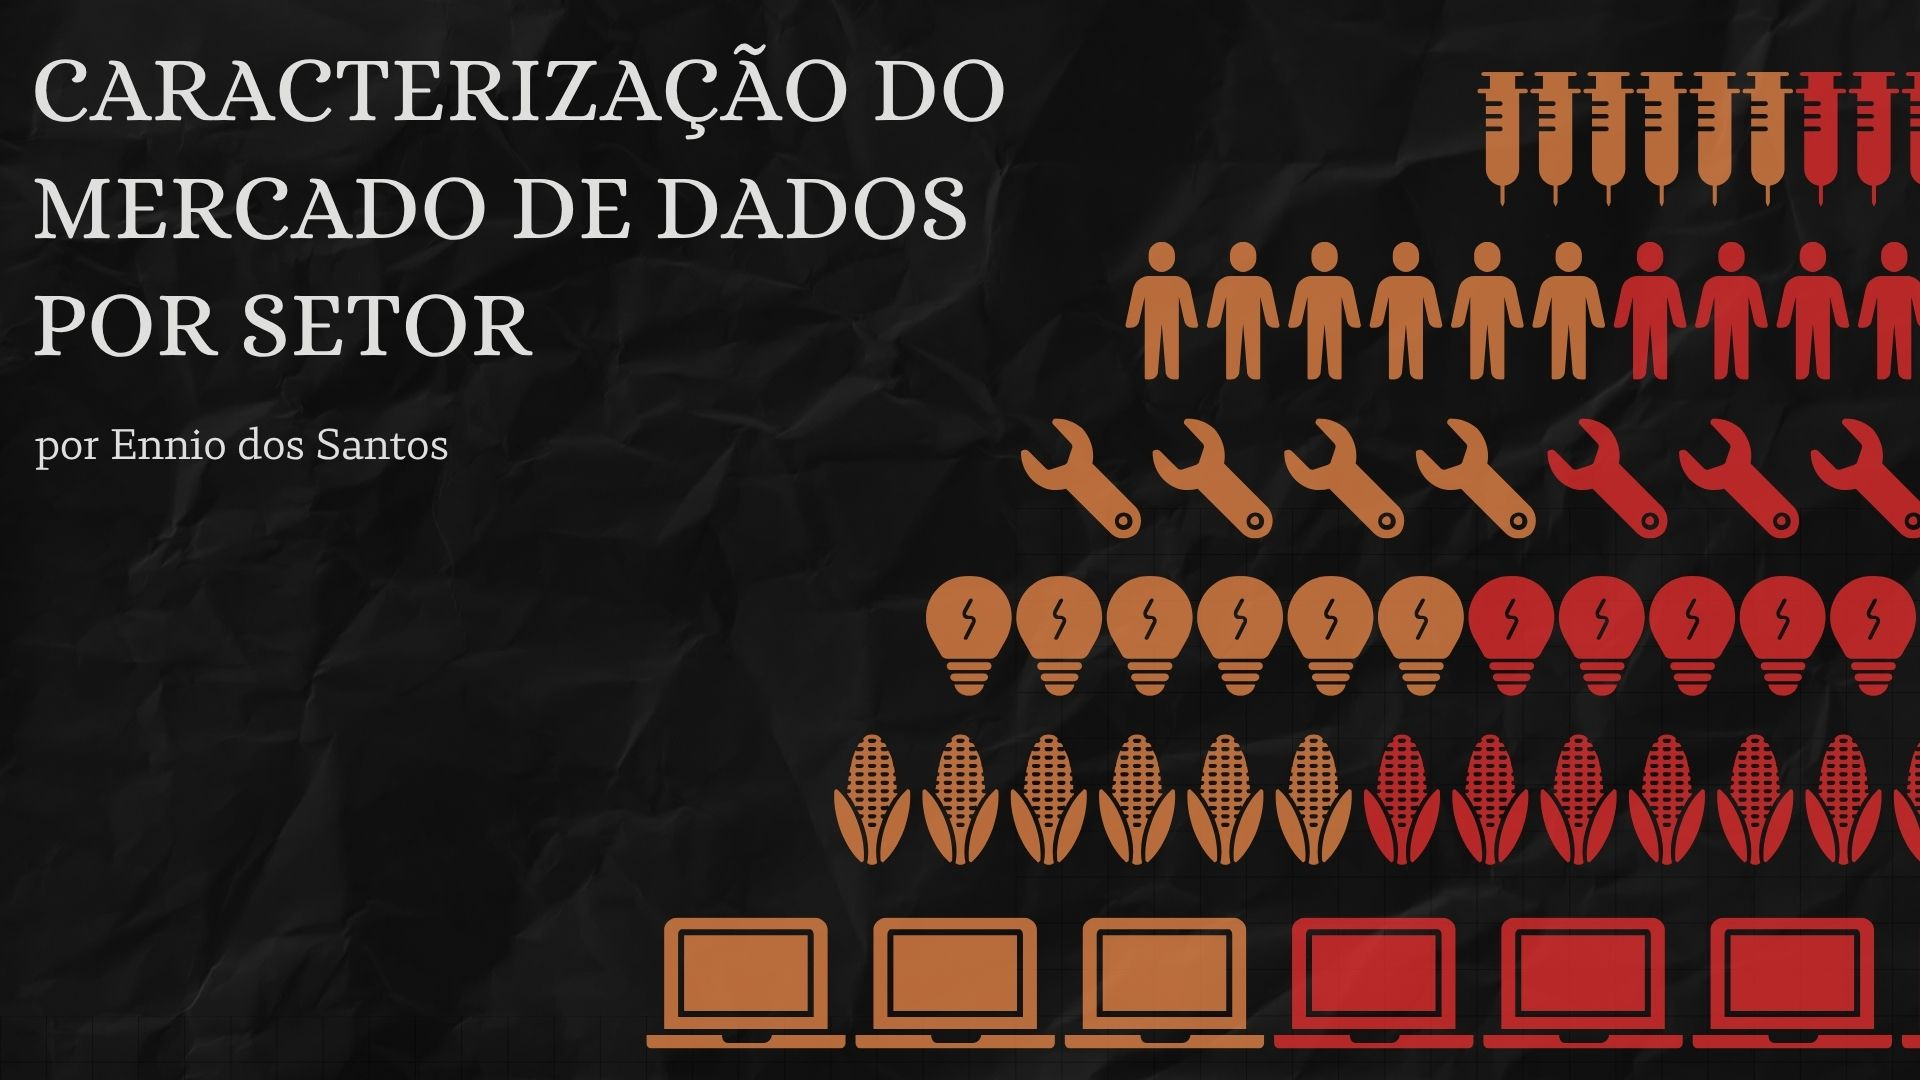

# Introdução

Estudantes e profissionais de Ciência de Dados se deparam com uma ampla gama de possibilidades no mercado de trabalho — desde diferentes cargos e níveis de senioridade até uma variedade de setores e modelos de atuação. Embora o mercado de dados já esteja consolidado em muitas empresas, o mercado de dados no Brasil apresenta dinâmicas distintas entre setores, influenciando desde a distribuição de profissionais até as práticas de trabalho e remuneração. Este estudo busca caracterizar esse ecossistema a partir de dados do State of Data Brazil 2024, com foco em quatro dimensões

1- Distribuição setorial: Onde estão concentrados os profissionais de dados?

2- Perfil profissional: Como variam cargos, níveis hierárquicos e formação acadêmica entre setores?

3- Modelos de trabalho: Quais arranjos de trabalho (presencial, híbrido, remoto) predominam em cada segmento?

4- Remuneração: Como as faixas salariais se distribuem entre diferentes indústrias?

5- Tendências temporais: vamos verificar como os setores tem evoluido ao longo dos anos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0 Tratamento de Dados
## 0.1 Leitura do Dataset
## 0.2 Seleção das colunas que serão usadas

In [2]:
df24 = pd.read_csv("/kaggle/input/state-of-data-brazil-20242025/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")
df22 = pd.read_csv('/kaggle/input/state-of-data-2022/State_of_data_2022.csv')
df23 = pd.read_csv('/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv')
df21 = pd.read_csv('/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv', low_memory=False)

In [3]:
# Etapa 1: Limpar parênteses e aspas
df21.columns = df21.columns.str.replace(r"[()']", "", regex=True).str.strip()

# Etapa 2: Remover "P" do início
df21.columns = df21.columns.str.replace(r"^P", "", regex=True)

# Etapa 3: Substituir " , " por "_" e remover espaços extras
df21.columns = df21.columns.str.replace(r"\s*,\s*", "_", regex=True).str.replace(r"\s+", "", regex=True)

# Etapa 1: Limpar parênteses e aspas
df22.columns = df22.columns.str.replace(r"[()']", "", regex=True).str.strip()

# Etapa 2: Remover "P" do início
df22.columns = df22.columns.str.replace(r"^P", "", regex=True)

# Etapa 3: Substituir " , " por "_" e remover espaços extras
df22.columns = df22.columns.str.replace(r"\s*,\s*", "_", regex=True).str.replace(r"\s+", "", regex=True)

# Etapa 1: Limpar parênteses e aspas
df23.columns = df23.columns.str.replace(r"[()']", "", regex=True).str.strip()

# Etapa 2: Remover "P" do início
df23.columns = df23.columns.str.replace(r"^P", "", regex=True)

# Etapa 3: Substituir " , " por "_" e remover espaços extras
df23.columns = df23.columns.str.replace(r"\s*,\s*", "_", regex=True).str.replace(r"\s+", "", regex=True)

In [4]:
'numero_de_funcionarios'# Colunas comuns em 2021 (com mapeamento para os nomes de 2024)
colunas_2021 = [
    # Setor da empresa
    "0_id",
    "2_b_Setor",                          # 2.b_setor
    "2_c_NumerodeFuncionarios",           # 2.c_numero_de_funcionarios
    "2_o_h_Maturidadedaempresaemtermosdetecnologiaedados",  # 2.l.8_Maturidade (critério de escolha)
    "2_q_Atualmentequalasuaformadetrabalho?",     # 2.r_modelo_de_trabalho_atual
    "2_r_Qualaformadetrabalhoidealparavocê?",     # 2.s_modelo_de_trabalho_ideal
    "2_s_Casosuaempresadecidapelomodelo100%presencialqualserásuaatitude?",  # 2.t_atitude_retorno_presencial
    
    # Pessoa e carreira
    "2_f_CargoAtual",                     # 2.f_cargo_atual
    "2_g_Nivel",                          # 2.g_nivel
    "2_h_Faixasalarial",                  # 2.h_faixa_salarial
    "2_d_Gestor?",                        # 2.d_atua_como_gestor
    "2_i_Quantotempodeexperiêncianaáreadedadosvocêtem?",      # 2.i_tempo_experiencia_dados
    "2_j_QuantotempodeexperiêncianaáreadeTI/EngenhariadeSoftwarevocêteveantesdecomeçaratrabalharnaáreadedados?",  # 2.j_tempo_experiencia_ti
    "2_k_Vocêestásatisfeitonasuaempresaatual?",    # 2.k_satisfeito_atualmente
    
    # Desejos e planos
    "2_n_Vocêpretendemudardeempregonospróximos6meses?",       # 2.n_planos_mudar_emprego
    "2_m_Vocêparticipoudeentrevistasdeempregonosúltimos6meses?",  # 2.m_participou_entrevistas
    "2_l_Qualoprincipalmotivodasuainsatisfaçãocomaempresaatual?",  # 2.l_motivo_insatisfacao
    "5_b_Qualoportunidadevocêestábuscando?",      # 5.b_oportunidade_buscada
    "5_c_Háquantotempovocêbuscaumaoportunidadenaáreadedados?",  # 5.c_tempo_busca_oportunidade
    "5_d_Comotemsidoabuscaporumempregonaáreadedados?",  # 5.d_experiencia_processos_seletivos
    
    # Formação
    "1_i_ÁreadeFormação",                 # 1.m_área_de_formação
    "1_h_NiveldeEnsino",                  # 1.l_nivel_de_ensino
    
    # Localização
    "1_e_a_ufondemora",                   # 1.i.1_uf_onde_mora
    "1_e_b_Regiaoondemora",               # 1.i.2_regiao_onde_mora
    "1_g_b_Regiaodeorigem"                # 1.k.2_regiao_de_origem
]

# Colunas comuns em 2022 (mapeadas para 2024)
colunas_2022 = [
    # Setor da empresa (nomes originais de 2022)
    "0_id",
    "2_b_Setor",
    "2_c_NumerodeFuncionarios",
    "2_o_8_Maturidadedaempresaemtermosdetecnologiaedados",  # 2.l.8_Maturidade
    "2_p_Atualmentequalasuaformadetrabalho?",     # 2.r_modelo_de_trabalho_atual
    "2_q_Qualaformadetrabalhoidealparavocê?",     # 2.s_modelo_de_trabalho_ideal
    "2_r_Casosuaempresadecidapelomodelo100%presencialqualserásuaatitude?",  # 2.t_atitude_retorno_presencial
    
    # Pessoa e carreira (idem 2021)
    "2_f_CargoAtual",
    "2_g_Nivel",
    "2_h_Faixasalarial",
    "2_d_Gestor?",
    "2_i_Quantotempodeexperiêncianaáreadedadosvocêtem?",
    "2_j_QuantotempodeexperiêncianaáreadeTI/EngenhariadeSoftwarevocêteveantesdecomeçaratrabalharnaáreadedados?",
    "2_k_Vocêestásatisfeitonasuaempresaatual?",
    
    # Desejos e planos (idem 2021)
    "2_n_Vocêpretendemudardeempregonospróximos6meses?",
    "2_m_Vocêparticipoudeentrevistasdeempregonosúltimos6meses?",
    "2_l_Qualoprincipalmotivodasuainsatisfaçãocomaempresaatual?",
    "5_b_Qualoportunidadevocêestábuscando?",
    "5_c_Háquantotempovocêbuscaumaoportunidadenaáreadedados?",
    "5_d_Comotemsidoabuscaporumempregonaáreadedados?",
    
    # Formação
    "1_m_ÁreadeFormação",                 # 1.m_área_de_formação
    "1_l_NiveldeEnsino",                  # 1.l_nivel_de_ensino
    
    # Localização
    "1_i_1_ufondemora",                   # 1.i.1_uf_onde_mora
    "1_i_2_Regiaoondemora",               # 1.i.2_regiao_onde_mora
    "1_k_Regiaodeorigem"                  # 1.k.2_regiao_de_origem
]

# Colunas comuns em 2023 (mapeadas para 2024)
colunas_2023 = [
    # Setor da empresa
    "0_id",
    "2_b_Setor",
    "2_c_NumerodeFuncionarios",
    "2_o_8_Maturidadedaempresaemtermosdetecnologiaedados",  # 2.l.8_Maturidade
    "2_r_Atualmentequalasuaformadetrabalho?",     # 2.r_modelo_de_trabalho_atual
    "2_s_Qualaformadetrabalhoidealparavocê?",     # 2.s_modelo_de_trabalho_ideal
    "2_t_Casosuaempresadecidapelomodelo100%presencialqualserásuaatitude?",  # 2.t_atitude_retorno_presencial
    
    # Pessoa e carreira (mesmo padrão)
    "2_f_CargoAtual",
    "2_g_Nivel",
    "2_h_Faixasalarial",
    "2_d_Gestor?",
    "2_i_Quantotempodeexperiêncianaáreadedadosvocêtem?",
    "2_j_QuantotempodeexperiêncianaáreadeTI/EngenhariadeSoftwarevocêteveantesdecomeçaratrabalharnaáreadedados?",
    "2_k_Vocêestásatisfeitonasuaempresaatual?",
    
    # Desejos e planos
    "2_n_Vocêpretendemudardeempregonospróximos6meses?",
    "2_m_Vocêparticipoudeentrevistasdeempregonosúltimos6meses?",
    "2_l_Qualoprincipalmotivodasuainsatisfaçãocomaempresaatual?",
    "5_b_Qualoportunidadevocêestábuscando?",
    "5_c_Háquantotempovocêbuscaumaoportunidadenaáreadedados?",
    "5_d_Comotemsidoabuscaporumempregonaáreadedados?",
    
    # Formação
    "1_m_ÁreadeFormação",
    "1_l_NiveldeEnsino",
    
    # Localização
  "1_i_1_ufondemora",
  "1_i_2_Regiaoondemora",
  "1_k_Regiaodeorigem"
]

colunas_2024 = [
    # Setor da empresa
    "0.a_token",
    "2.b_setor",
    "2.c_numero_de_funcionarios",
    "2.l.8_Maturidade da empresa em termos de tecnologia e dados",
    "2.r_modelo_de_trabalho_atual",
    "2.s_modelo_de_trabalho_ideal",
    "2.t_atitude_em_caso_de_retorno_presencial",
    
    # Pessoa e carreira
    "2.f_cargo_atual",
    "2.g_nivel",
    "2.h_faixa_salarial",
    "2.d_atua_como_gestor",
    "2.i_tempo_de_experiencia_em_dados",
    "2.j_tempo_de_experiencia_em_ti",
    "2.k_satisfeito_atualmente",
    
    # Desejos e planos
    "2.n_planos_de_mudar_de_emprego_6m",
    "2.m_participou_de_entrevistas_ultimos_6m",
    "2.l_motivo_insatisfacao",
    "5.b_oportunidade_buscada",
    "5.c_tempo_em_busca_de_oportunidade",
    "5.d_experiencia_em_processos_seletivos",
    
    # Formação
    "1.m_área_de_formação",
    "1.l_nivel_de_ensino",
    
    # Localização
    "1.i.1_uf_onde_mora",
    "1.i.2_regiao_onde_mora",
    "1.k.2_regiao_de_origem"
]

df2024 = df24[colunas_2024]
df2021 = df21[colunas_2021]
df2022 = df22[colunas_2022]
df2023 = df23[colunas_2023]

### A celula abaixo precisa ser executada duas vezes para ficar sem erro

In [5]:
df2024.loc[:, 'ano_coleta'] = 2024

/tmp/ipykernel_19/2589407836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2024.loc[:, 'ano_coleta'] = 2024


In [6]:
df2023.loc[:, 'ano_coleta'] = 2023

/tmp/ipykernel_19/3852115930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023.loc[:, 'ano_coleta'] = 2023


In [7]:
df2022.loc[:, 'ano_coleta'] = 2022

/tmp/ipykernel_19/2844152086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022.loc[:, 'ano_coleta'] = 2022


In [8]:
df2021.loc[:, 'ano_coleta'] = 2021

/tmp/ipykernel_19/695670446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021.loc[:, 'ano_coleta'] = 2021


## 0.4 Padronização das colunas

In [9]:
colunas_padrao = [
    # Setor da empresa
    "token",
    "setor",
    "numero_de_funcionarios",
    "Maturidade da empresa em termos de tecnologia e dados",
    "modelo_de_trabalho_atual",
    "modelo_de_trabalho_ideal",
    "atitude_em_caso_de_retorno_presencial",
    
    # Pessoa e carreira
    "cargo_atual",
    "nivel",
    "faixa_salarial",
    "atua_como_gestor",
    "tempo_de_experiencia_em_dados",
    "tempo_de_experiencia_em_ti",
    "satisfeito_atualmente",
    
    # Desejos e planos
    "planos_de_mudar_de_emprego_6m",
    "participou_de_entrevistas_ultimos_6m",
    "motivo_insatisfacao",
    "oportunidade_buscada",
    "tempo_em_busca_de_oportunidade",
    "experiencia_em_processos_seletivos",
    
    # Formação
    "área_de_formação",
    "nivel_de_ensino",
    
    # Localização
    "uf_onde_mora",
    "regiao_onde_mora",
    "regiao_de_origem",
    "ano_coleta"
]

df2024.columns = [colunas_padrao]
df2023.columns = [colunas_padrao]
df2022.columns = [colunas_padrao]
df2021.columns = [colunas_padrao]

## 0.5 Calculo do Tamanho das Empresas

### A celula abaixo precisa ser executada duas vezes para ficar sem erro

In [10]:
mapeamento = {
    'de 1 a 5': 'Microempresa',
    'de 6 a 10': 'Microempresa',
    'de 11 a 50': 'Pequena',
    'de 51 a 100': 'Media',
    'de 101 a 500':'Grande',
    'de 501 a 1.000':'Grande',
    'de 1.001 a 3.000':'Grande',
    'Acima de 3.000':'Mega'
}

In [11]:
df2024.loc[:, 'Tamanho_Empresa'] = df2024[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')

/tmp/ipykernel_19/4221596806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2024.loc[:, 'Tamanho_Empresa'] = df2024[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')


In [12]:
df2023.loc[:, 'Tamanho_Empresa'] = df2023[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')

/tmp/ipykernel_19/3967587700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023.loc[:, 'Tamanho_Empresa'] = df2023[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')


In [13]:
df2021.loc[:, 'Tamanho_Empresa'] = df2021[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')

/tmp/ipykernel_19/3792666062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021.loc[:, 'Tamanho_Empresa'] = df2021[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')


In [14]:
df2021.loc[:, 'Tamanho_Empresa'] = df2021[('numero_de_funcionarios',)].map(mapeamento).fillna('Desconhecido')

## 0.6 Formatação das colunas

In [15]:
df24 = df2024
df24.columns = ['_'.join([str(i) for i in col]).strip() if isinstance(col, tuple) else str(col).strip() for col in df24.columns]

In [16]:
df23 = df2023
df22 = df2022
df21 = df2021


# 1 Distribuição por setor

Neste sessão iremos verificar onde estão os profissionais da área de dados, quais os setores com mais profissionais e onde não tem

## 1.1 Quantidade de profissionais por setor                                                             
                                                                

Vamos verificar a quantidade de profissionais por setor:
- Como são variáveis qualitativas vamos fazer um distribuição de frequencia

In [17]:
distro_setor = df24.groupby('setor').size()
distro_setor = distro_setor.sort_values(ascending=False)
total = distro_setor.sum()
distro_percent = (distro_setor / total * 100).round(2)
distro_df = pd.DataFrame({
    'Quantidade': distro_setor,
    'Porcentagem (%)': distro_percent
})
distro_df.loc['Total'] = [total, 100]
distro_df


Quantidade  Porcentagem (%)
setor                                                           
Finanças ou Bancos                         1035            21.28
Tecnologia/Fábrica de Software              942            19.37
Varejo                                      380             7.81
Área de Consultoria                         354             7.28
Outra Opção                                 332             6.83
Indústria                                   328             6.74
Área da Saúde                               195             4.01
Educação                                    194             3.99
Internet/Ecommerce                          153             3.15
Setor Alimentício                           143             2.94
Setor Público                               142             2.92
Marketing                                   114             2.34
Telecomunicação                             103             2.12
Agronegócios                                 84             1.73
Setor de Energia                             82             1.69
Setor Imobiliário/ Construção Civil          74             1.52
Seguros ou Previdência                       65             1.34
Setor Automotivo                             55             1.13
Entretenimento ou Esportes                   46             0.95
Setor Farmaceutico                           27             0.56
Filantropia/ONG's                            15             0.31
Total                                      4863           100.00

- Já da pra perceber os setores que mais tem destaque.
- Vamos plotar um histograma pra visualizar melhor esses dados 

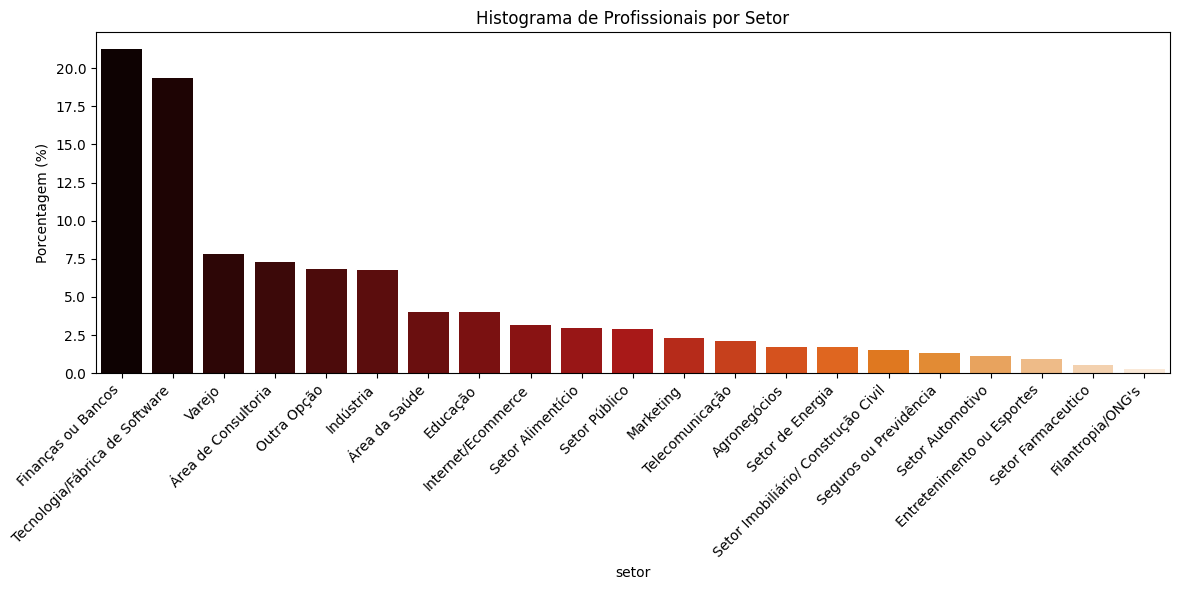

In [18]:

# Remove a linha 'Total' para fins de visualização
distro_plot = distro_df.drop(index='Total')

# Resetar índice para transformar o índice ('setor') em coluna
distro_plot = distro_plot.reset_index().rename(columns={'index': 'setor'})

# Criar histograma de barras (na prática, é um countplot com dados agregados)
plt.figure(figsize=(12, 6))
sns.barplot(data=distro_plot, x='setor', y='Porcentagem (%)', palette='gist_heat')

# Estética
plt.xticks(rotation=45, ha='right')
plt.title('Histograma de Profissionais por Setor')
plt.xlabel('setor')
plt.ylabel('Porcentagem (%)')
plt.tight_layout()
plt.show()


- Gráfico tem um formato parecido com os graficos de pareto classicos.
- Vamos plotar um pareto para verificar se os dados se comportam na regra do 80/20 de Pareto

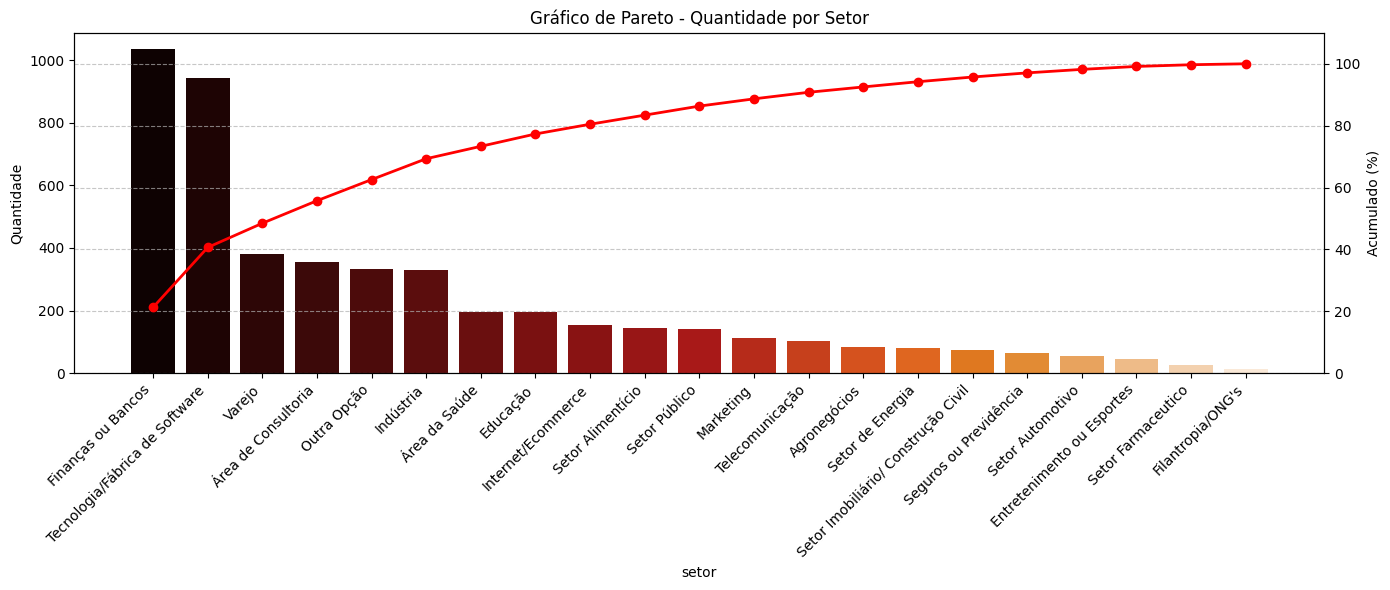

In [19]:
# Remover linha 'Total'
distro_pareto = distro_df.drop(index='Total').copy()

# Ordenar do maior para o menor
distro_pareto = distro_pareto.sort_values(by='Quantidade', ascending=False)

# Calcular porcentagem acumulada
distro_pareto['Acumulado (%)'] = distro_pareto['Quantidade'].cumsum() / distro_pareto['Quantidade'].sum() * 100

# Gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras (quantidade)
sns.barplot(x=distro_pareto.index, y='Quantidade', data=distro_pareto, ax=ax1, palette='gist_heat')
ax1.set_ylabel('Quantidade')
ax1.set_xticklabels(distro_pareto.index, rotation=45, ha='right')

# Linha de porcentagem acumulada
ax2 = ax1.twinx()
ax2.plot(distro_pareto.index, distro_pareto['Acumulado (%)'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Acumulado (%)')
ax2.set_ylim(0, 110)  # Pode passar um pouco de 100% por arredondamento

# Título e layout
plt.title('Gráfico de Pareto - Quantidade por Setor')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Os grafico mostram que não segue a regra de Pareto, mas podemos fazer algumas observações:

- Os três primeiros setores concentram uma grande parcela da força de trabalho em dados:
    
  - Finanças ou Bancos
        
    - Tecnologia/Fábrica de Software
        
    - Varejo
        
    Sozinhos, esses setores parecem representar mais de 50% do total, com base na curva acumulada.

- Para profissionais de dados, Finanças, Tecnologia e Varejo são setores muito mais promissores em termos de oportunidade de trabalho.

- Os setores no final do gráfico podem representar nichos ou áreas emergentes onde há espaço para crescimento ou especialização.

## 1.2 Tamanho das empresas por setor

### 1.2.1 Distribuição das Frequencias do Setor x Tamanho da empresa

- Para facilitação das análises foi definido o tamanho das empresas com base na quantidade de funcionários 

    de 1 a 10: Microempresa,
    
    de 11 a 50: Pequena,
    
    de 51 a 100: Media,
    
    de 101 a 3.000: Grande e
    
    Acima de 3.000: Mega

In [20]:
distro_setor = df24.groupby('Tamanho_Empresa').size()
distro_setor

Tamanho_Empresa
Desconhecido     354
Grande          1752
Media            309
Mega            2335
Microempresa     183
Pequena          284
dtype: int64

In [21]:
ordem_colunas = ["Microempresa", "Pequena", "Media","Grande","Mega"]
tabela = pd.crosstab(df24['setor'], df24['Tamanho_Empresa']).reindex(columns=ordem_colunas, fill_value=0)
tabela['Total'] = tabela.sum(axis=1)
tabela.loc['Total'] = tabela.sum()

# Separe a linha Total
linha_total = tabela.loc[['Total']]
tabela_sem_total = tabela.drop('Total')

# Ordene as linhas normais e reuna com a linha total no final
tabela_final = pd.concat([tabela_sem_total.sort_values(by='Total', ascending=False), linha_total])

tabela_final


Tamanho_Empresa                      Microempresa  Pequena  Media  Grande  \
setor                                                                       
Finanças ou Bancos                             14       30     27     342   
Tecnologia/Fábrica de Software                 58       86    100     392   
Varejo                                          3        1      8      66   
Área de Consultoria                            26       41     51     140   
Outra Opção                                    17       17     24     148   
Indústria                                       7        9     10      84   
Área da Saúde                                   4       17     10      94   
Educação                                        6       17     12     101   
Internet/Ecommerce                              6        6      4      43   
Setor Alimentício                               3        3      4      31   
Setor Público                                   1        6      6      58   
Marketing                                      15       15     12      57   
Telecomunicação                                 2        4      7      28   
Agronegócios                                    5       11      5      26   
Setor de Energia                                1        3      6      31   
Setor Imobiliário/ Construção Civil             8        2      8      36   
Seguros ou Previdência                          0        4      4      25   
Setor Automotivo                                1        2      3      20   
Entretenimento ou Esportes                      2        5      7      21   
Setor Farmaceutico                              1        1      1       3   
Filantropia/ONG's                               3        4      0       6   
Total                                         183      284    309    1752   

Tamanho_Empresa                      Mega  Total  
setor                                             
Finanças ou Bancos                    622   1035  
Tecnologia/Fábrica de Software        306    942  
Varejo                                302    380  
Área de Consultoria                    96    354  
Outra Opção                           126    332  
Indústria                             218    328  
Área da Saúde                          70    195  
Educação                               58    194  
Internet/Ecommerce                     94    153  
Setor Alimentício                     102    143  
Setor Público                          71    142  
Marketing                              15    114  
Telecomunicação                        62    103  
Agronegócios                           37     84  
Setor de Energia                       41     82  
Setor Imobiliário/ Construção Civil    20     74  
Seguros ou Previdência                 32     65  
Setor Automotivo                       29     55  
Entretenimento ou Esportes             11     46  
Setor Farmaceutico                     21     27  
Filantropia/ONG's                       2     15  
Total                                2335   4863

### 1.2.2 Distribuição das Frequencias Absoluta do Setor x Tamanho da empresa (em relação ao total geral)

Fazendo uma análise das distribuições conseguimos fazer algumas inferencias valiosas.

Quando olhamos os totais das colunas (tamanho da empresa) percebemos que:
- 84.05% dos entrevistados trabalham em grandes e mega empresas, ou seja, empresas acima de 101 funcionarios
- 48,02% trabalham em empresas com mais de 3000 funcionarios.

Quando verificamos os totais das linhas (setores)
- Pode se verificar que os os profissionais estão fortemente concentrados em poucos setores, principalmente:
    - Finanças/Bancos
    - Tecnologia/Fábrica de Software
    - Varejo
    - Consultoria
    - Indústria
    - Outras opções genéricas

In [22]:
# Tabela de frequência absoluta
tabela = pd.crosstab(df24['setor'], df24['Tamanho_Empresa']).reindex(columns=ordem_colunas, fill_value=0)
# Total geral
total_geral = tabela.values.sum()
# Tabela em porcentagem do total geral
tabela_percent = tabela / total_geral * 100
# Adiciona coluna "Total" (por linha) e linha "Total" (por coluna)
tabela_percent['Total'] = tabela_percent.sum(axis=1)
tabela_percent.loc['Total'] = tabela_percent.sum()
# Separa linha 'Total' antes de ordenar
linha_total = tabela_percent.loc[['Total']]
tabela_ordenada = tabela_percent.drop(index='Total').sort_values(by='Total', ascending=False)
# Junta a linha Total no final
tabela_final = pd.concat([tabela_ordenada, linha_total])
# Exibir resultado
tabela_final.round(2)

Tamanho_Empresa                      Microempresa  Pequena  Media  Grande  \
setor                                                                       
Finanças ou Bancos                           0.29     0.62   0.56    7.03   
Tecnologia/Fábrica de Software               1.19     1.77   2.06    8.06   
Varejo                                       0.06     0.02   0.16    1.36   
Área de Consultoria                          0.53     0.84   1.05    2.88   
Outra Opção                                  0.35     0.35   0.49    3.04   
Indústria                                    0.14     0.19   0.21    1.73   
Área da Saúde                                0.08     0.35   0.21    1.93   
Educação                                     0.12     0.35   0.25    2.08   
Internet/Ecommerce                           0.12     0.12   0.08    0.88   
Setor Alimentício                            0.06     0.06   0.08    0.64   
Setor Público                                0.02     0.12   0.12    1.19   
Marketing                                    0.31     0.31   0.25    1.17   
Telecomunicação                              0.04     0.08   0.14    0.58   
Agronegócios                                 0.10     0.23   0.10    0.53   
Setor de Energia                             0.02     0.06   0.12    0.64   
Setor Imobiliário/ Construção Civil          0.16     0.04   0.16    0.74   
Seguros ou Previdência                       0.00     0.08   0.08    0.51   
Setor Automotivo                             0.02     0.04   0.06    0.41   
Entretenimento ou Esportes                   0.04     0.10   0.14    0.43   
Setor Farmaceutico                           0.02     0.02   0.02    0.06   
Filantropia/ONG's                            0.06     0.08   0.00    0.12   
Total                                        3.76     5.84   6.35   36.03   

Tamanho_Empresa                       Mega   Total  
setor                                               
Finanças ou Bancos                   12.79   21.28  
Tecnologia/Fábrica de Software        6.29   19.37  
Varejo                                6.21    7.81  
Área de Consultoria                   1.97    7.28  
Outra Opção                           2.59    6.83  
Indústria                             4.48    6.74  
Área da Saúde                         1.44    4.01  
Educação                              1.19    3.99  
Internet/Ecommerce                    1.93    3.15  
Setor Alimentício                     2.10    2.94  
Setor Público                         1.46    2.92  
Marketing                             0.31    2.34  
Telecomunicação                       1.27    2.12  
Agronegócios                          0.76    1.73  
Setor de Energia                      0.84    1.69  
Setor Imobiliário/ Construção Civil   0.41    1.52  
Seguros ou Previdência                0.66    1.34  
Setor Automotivo                      0.60    1.13  
Entretenimento ou Esportes            0.23    0.95  
Setor Farmaceutico                    0.43    0.56  
Filantropia/ONG's                     0.04    0.31  
Total                                48.02  100.00

### 1.2.3 Mapa de Calor do Setor pelo tamanho,

Com o mapa de calor fica ainda mais claro que os 6 primeiros setores tem a maior concentração de trabalhadores da area de dados principalmente em grandes empresas.

- O setor do varejo e a industria são o terceiro e o sexto maior em quantidade de profissionais, eles estão bem concentrados em empresas gigantes. Empresas menores estão proximos de zero

- O setor de Tecnologia e Software apesar de ser o segundo maior não segue a regra geral a risca e tem mais profissionais em grandes empresas (de 100-3000 funcionarios) do que mega empresas de mais de 3000 funcionarios.

- 12,79% de todos os profissionais de dados trabalham em mega empresas de finanças ou bancos 

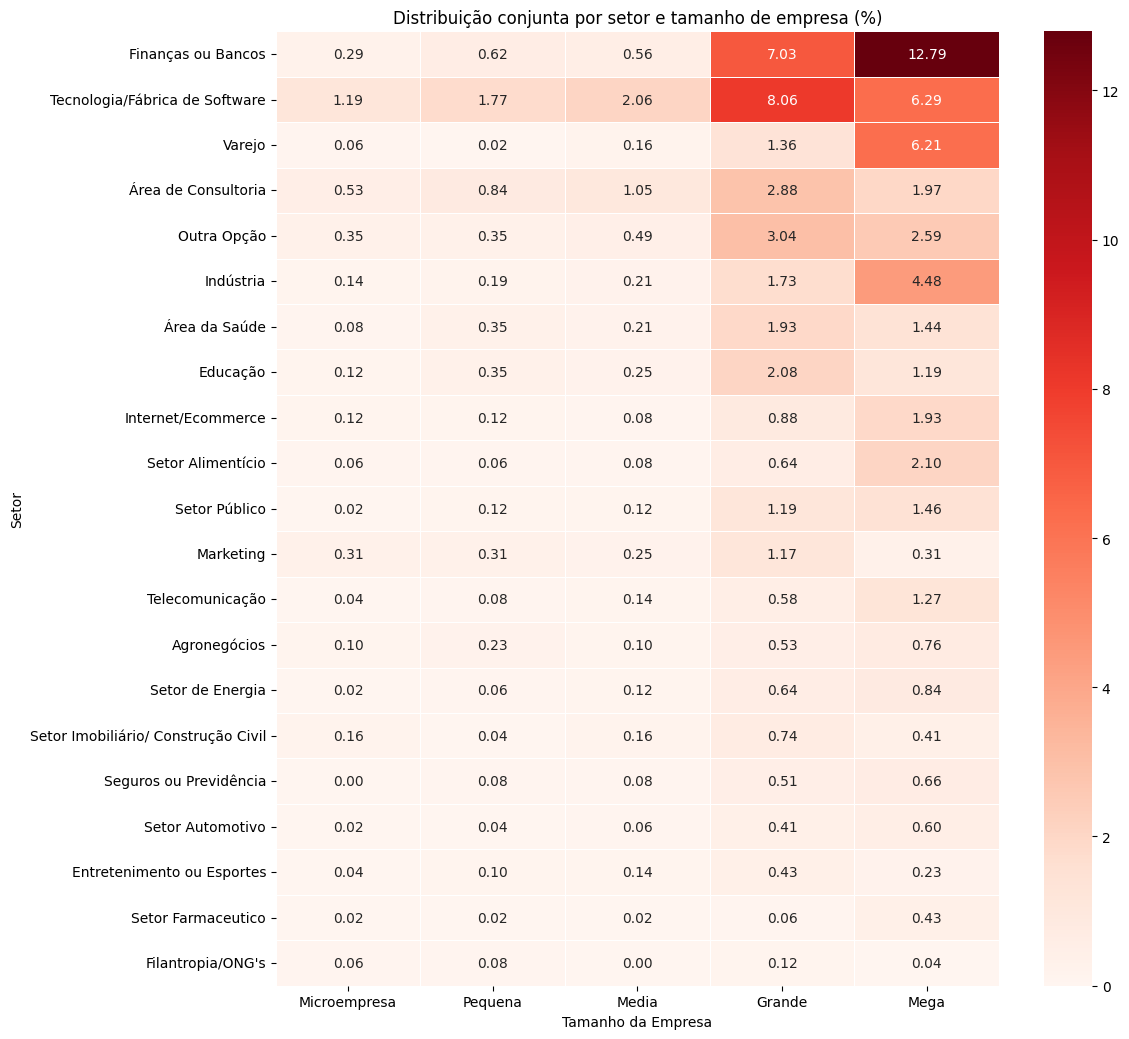

In [23]:
tabela_ordenada = tabela_ordenada.drop(columns='Total')

plt.figure(figsize=(12, len(tabela_ordenada) * 0.5))  # Altura ajustada pela quantidade de linhas

sns.heatmap(tabela_ordenada, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5)

plt.title("Distribuição conjunta por setor e tamanho de empresa (%)")
plt.xlabel("Tamanho da Empresa")
plt.ylabel("Setor")
plt.tight_layout()
plt.show()

# 2 Perfil Profissional por Setor


## 2.1 Distribuição de cargos e niveis por setor

- Vamos iniciar a análise traçando os histogramas das distribuições de Nivel de Senioridade e distribuição dos cargos

### Gráfico de Barras – Distribuição de Nível

Mostra a distribuição de profissionais entre os níveis Júnior, Pleno e Sênior.

O nível Sênior é o mais representado, com cerca de 1.580 profissionais.

Em seguida vem o Pleno, com aproximadamente 1.380.

O nível Júnior tem a menor representação, com cerca de 870.

Conclusão parcial: A maioria dos profissionais é mais experiente (Pleno ou Sênior), o que pode refletir um mercado mais maduro ou que exige maior qualificação.

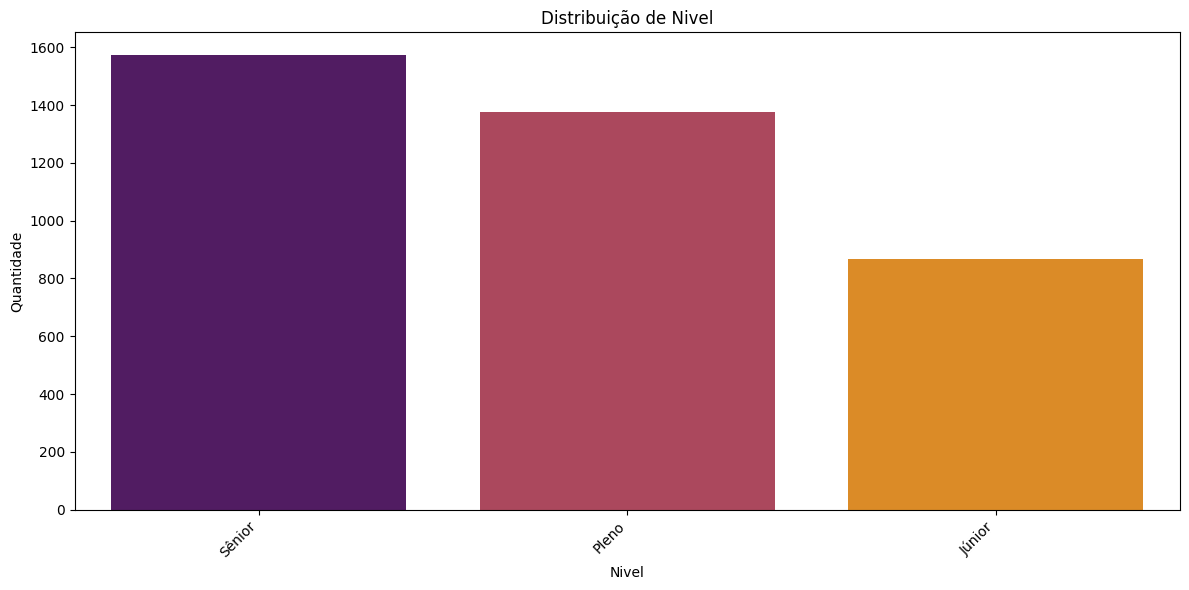

In [24]:
nivel = df24['nivel'].value_counts()  

df_plot = nivel.reset_index()
df_plot.columns = ['nivel', 'quantidade']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='nivel', y='quantidade', palette='inferno')

plt.title('Distribuição de Nivel')
plt.xlabel('Nivel')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Gráfico de Barras Empilhadas – Distribuição de Nível por Setor
Mostra a quantidade de profissionais por nível em cada setor.

Finanças/Bancos, Tecnologia/Fábrica de Software e Consultoria são os setores com maior número de profissionais, principalmente nos níveis Pleno e Sênior.

O nível Júnior aparece de forma mais distribuída, mas em menor volume na maioria dos setores.

Conclusão parcial: Setores mais técnicos e de alta complexidade tendem a empregar mais profissionais experientes. O nível júnior aparece mais nas áreas menos exigentes ou que estão em crescimento.

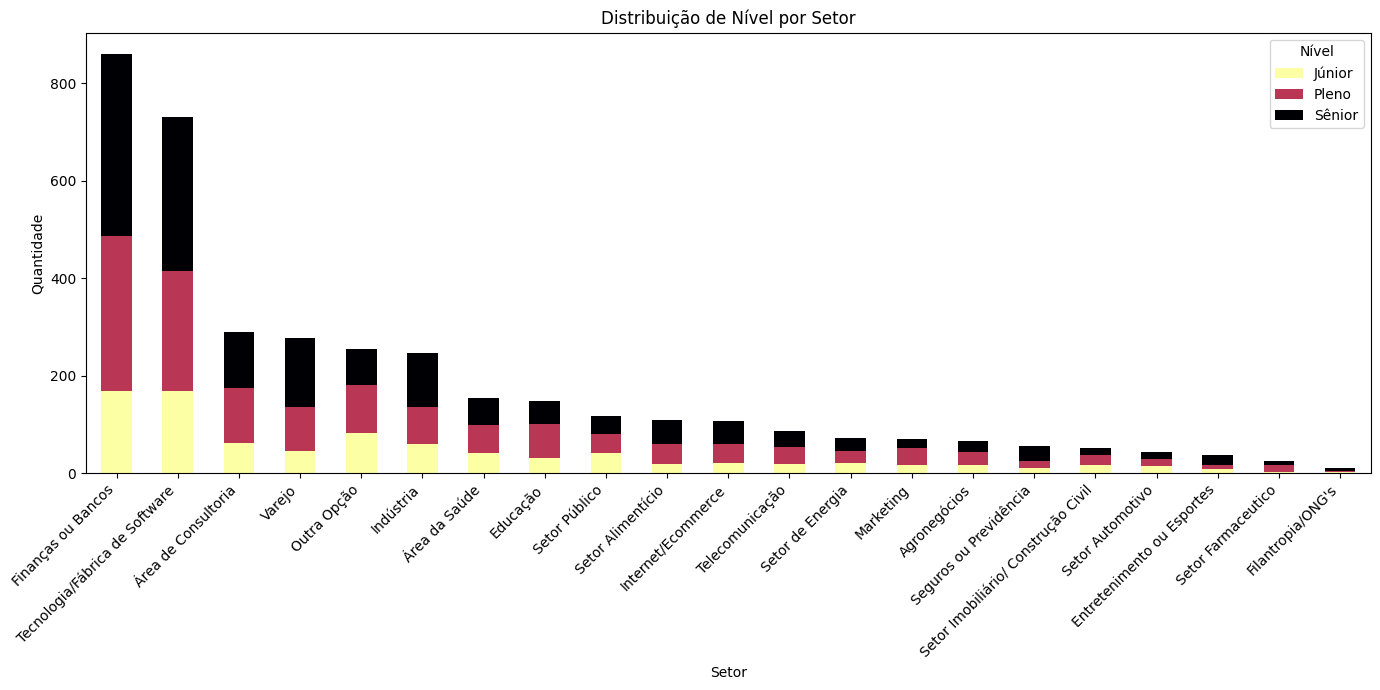

In [25]:
tabela = pd.crosstab(df24['setor'], df24['nivel'])

# Ordenar setores por total
tabela['Total'] = tabela.sum(axis=1)
tabela = tabela.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot
tabela.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='inferno_r')
plt.title('Distribuição de Nível por Setor')
plt.ylabel('Quantidade')
plt.xlabel('Setor')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nível')
plt.tight_layout()
plt.show()


### Gráfico de Barras – Distribuição de Cargos
Mostra a quantidade de profissionais por cargo atual.

O cargo de Analista de Dados/Data Analyst lidera com folga, seguido por Cientista de Dados/Data Scientist e Engenheiro de Dados/Data Architect.

Há uma grande variedade de cargos, o que mostra a diversidade de atuações na área de dados.

Conclusão parcial: O mercado ainda é dominado por cargos mais generalistas como analistas, com cargos mais técnicos e específicos aparecendo em menor volume.

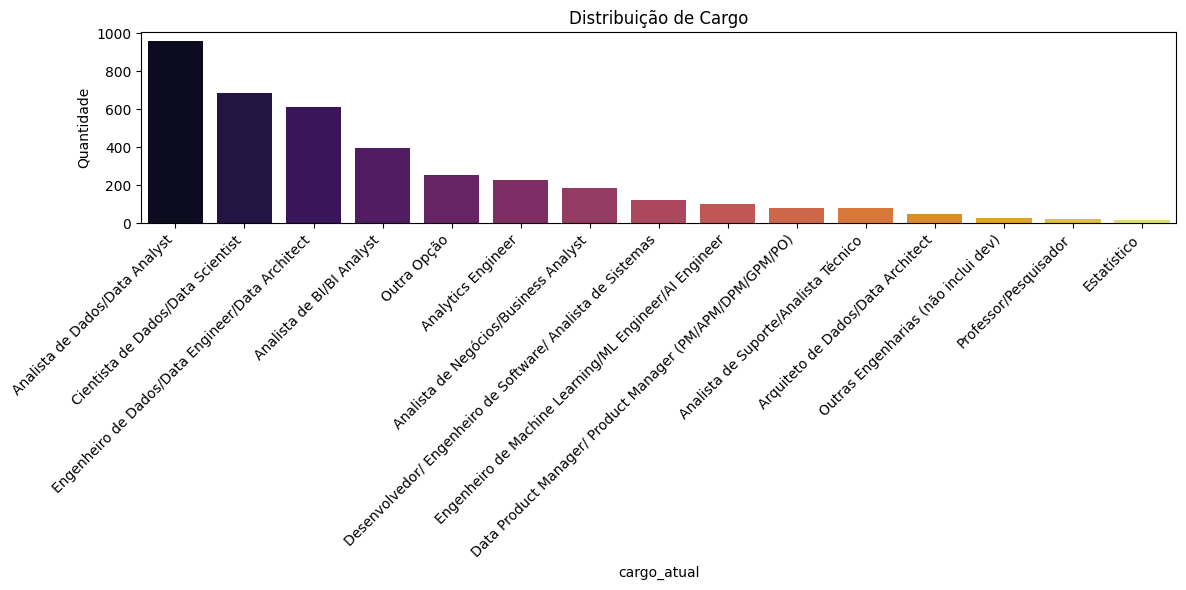

In [26]:
cargo = df24['cargo_atual'].value_counts()  

df_plot = cargo.reset_index()
df_plot.columns = ['cargo_atual', 'quantidade']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='cargo_atual', y='quantidade', palette='inferno')

plt.title('Distribuição de Cargo')
plt.xlabel('cargo_atual')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Mapa de Calor – Frequência de Cargos por Setor
Descrição: Mostra como os diferentes cargos estão distribuídos entre os setores.

Interpretação:

Analistas de Dados, Cientistas de Dados e Engenheiros de Dados são os cargos mais frequentes nos setores de Finanças, Tecnologia e Consultoria.

Alguns cargos são praticamente inexistentes em setores como ONGs, Setor Público, Educação, etc.

Conclusão parcial: Cargos técnicos estão mais concentrados em setores privados com maior investimento em tecnologia e análise de dados.

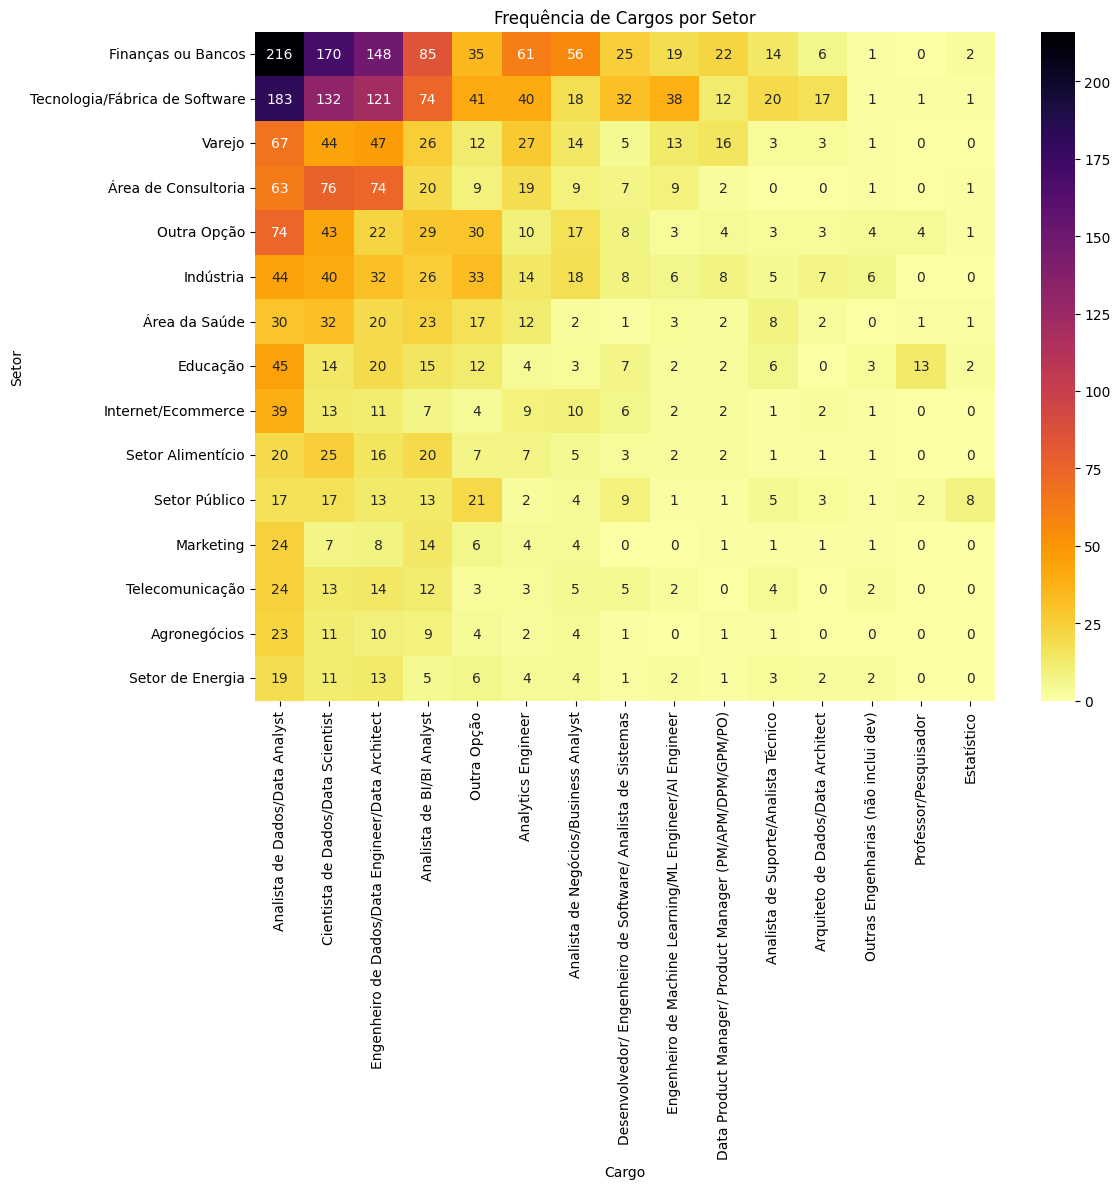

In [27]:
# Cargos x Setores
tabela = pd.crosstab(df24['setor'], df24['cargo_atual'])

# Reduzir para top setores e cargos
top_setores = df24['setor'].value_counts().head(15).index
top_cargos = df24['cargo_atual'].value_counts().head(15).index
tabela = tabela.loc[top_setores, top_cargos]

# Plot
plt.figure(figsize=(12, 12))
sns.heatmap(tabela, annot=True, fmt='d', cmap='inferno_r')
plt.title('Frequência de Cargos por Setor')
plt.ylabel('Setor')
plt.xlabel('Cargo')
plt.tight_layout()
plt.show()


In [28]:
ordem_colunas = ["Júnior", "Pleno", "Sênior"]
# Tabela de frequência absoluta
tabela = pd.crosstab(df24['cargo_atual'], df24['nivel']).reindex(columns=ordem_colunas, fill_value=0)

# Total geral
total_geral = tabela.values.sum()

# Tabela em porcentagem do total geral
tabela_percent = tabela / total_geral * 100

# Adiciona coluna "Total" (por linha) e linha "Total" (por coluna)
tabela_percent['Total'] = tabela_percent.sum(axis=1)
tabela_percent.loc['Total'] = tabela_percent.sum()

# Separa linha 'Total' antes de ordenar
linha_total = tabela_percent.loc[['Total']]
tabela_ordenada = tabela_percent.drop(index='Total').sort_values(by='Total', ascending=False)

# Junta a linha Total no final
tabela_final = pd.concat([tabela_ordenada, linha_total])

# Exibir resultado
tabela_final.round(2)

nivel                                               Júnior  Pleno  Sênior  \
cargo_atual                                                                 
Analista de Dados/Data Analyst                        6.39  10.24    8.43   
Cientista de Dados/Data Scientist                     3.09   6.02    8.88   
Engenheiro de Dados/Data Engineer/Data Architect      2.41   5.53    8.12   
Analista de BI/BI Analyst                             3.30   4.40    2.67   
Outra Opção                                           3.54   1.55    1.57   
Analytics Engineer                                    0.79   2.17    3.01   
Analista de Negócios/Business Analyst                 0.92   1.73    2.17   
Desenvolvedor/ Engenheiro de Software/ Analista...    0.76   1.28    1.15   
Engenheiro de Machine Learning/ML Engineer/AI E...    0.24   0.94    1.52   
Data Product Manager/ Product Manager (PM/APM/D...    0.10   0.39    1.60   
Analista de Suporte/Analista Técnico                  0.76   0.81    0.50   
Arquiteto de Dados/Data Architect                     0.03   0.26    0.97   
Outras Engenharias (não inclui dev)                   0.16   0.37    0.24   
Professor/Pesquisador                                 0.13   0.18    0.24   
Estatístico                                           0.13   0.18    0.13   
Total                                                22.73  36.07   41.20   

nivel                                                Total  
cargo_atual                                                 
Analista de Dados/Data Analyst                       25.07  
Cientista de Dados/Data Scientist                    17.99  
Engenheiro de Dados/Data Engineer/Data Architect     16.06  
Analista de BI/BI Analyst                            10.37  
Outra Opção                                           6.65  
Analytics Engineer                                    5.97  
Analista de Negócios/Business Analyst                 4.82  
Desenvolvedor/ Engenheiro de Software/ Analista...    3.20  
Engenheiro de Machine Learning/ML Engineer/AI E...    2.70  
Data Product Manager/ Product Manager (PM/APM/D...    2.10  
Analista de Suporte/Analista Técnico                  2.07  
Arquiteto de Dados/Data Architect                     1.26  
Outras Engenharias (não inclui dev)                   0.76  
Professor/Pesquisador                                 0.55  
Estatístico                                           0.45  
Total                                               100.00

In [29]:
mapeamento_parcial = {
    'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)': 'Prod. Manager (PM/APM/DPM/GPM/PO)',
    'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas': 'Dev/Eng. Soft',
    'Engenheiro de Dados/Data Engineer/Data Architect': 'Engenheiro de Dados',
    'Engenheiro de Machine Learning/ML Engineer/AI Engineer': 'Engenheiro de ML/AI',
}
ordem_setores = {
'Analista de Dados/Data Analyst',
'Cientista de Dados/Data Scientist',
'Engenheiro de Dados/Data Engineer/Data Architect',
'Analista de BI/BI Analyst',
'Outra Opção',
'Analytics Engineer',
'Analista de Negócios/Business Analyst',
'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
'Engenheiro de Machine Learning/ML Engineer/AI Engineer',
'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)',
'Analista de Suporte/Analista Técnico',
'Arquiteto de Dados/Data Architect',
'Outras Engenharias (não inclui dev)',
'Professor/Pesquisador',
'Estatístico',
   
}


maiores_setores = ['Finanças ou Bancos', 'Tecnologia/Fábrica de Software', 'Varejo', 'Área de Consultoria']

In [30]:
# Filtrar o DataFrame para conter apenas esses setores
df_filtrado = df24[df24['setor'].isin(maiores_setores)]
df_filtrado.loc[:, 'cargo_atual'] = df_filtrado['cargo_atual'].replace(mapeamento_parcial)

# Agrupar e contar
df_grouped = df_filtrado.groupby(['setor', 'nivel', 'cargo_atual']).size().reset_index(name='Contagem')

### Treemap – Distribuição de Cargos por Setor
Representa visualmente a proporção de cargos por setor dos 4 maiores setores.

Finanças tem uma predominância clara de Analistas de Dados, Engenheiros de Dados e cargos de análise em geral.

Tecnologia apresenta maior diversidade, incluindo ML Engineers, Dev/Eng. Software, e Arquitetos de Dados.

Setores como Varejo e Consultoria têm participação significativa, mas com menor diversidade.

Conclusão parcial: Setores mais técnicos ou com foco em inovação têm não só mais profissionais, mas também maior variedade de cargos.



In [31]:
import plotly.express as px

# Agrupar os dados
df_treemap = df24.groupby(['setor', 'cargo_atual']).size().reset_index(name='contagem')

# Criar o treemap
fig = px.treemap(
    df_treemap,
    path=['setor', 'cargo_atual'],  # hierarquia
    values='contagem',
    color='setor',  # colorir por setor
    color_discrete_sequence=px.colors.qualitative.Set3,
    title='Distribuição de Cargos por Setor (Treemap)'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


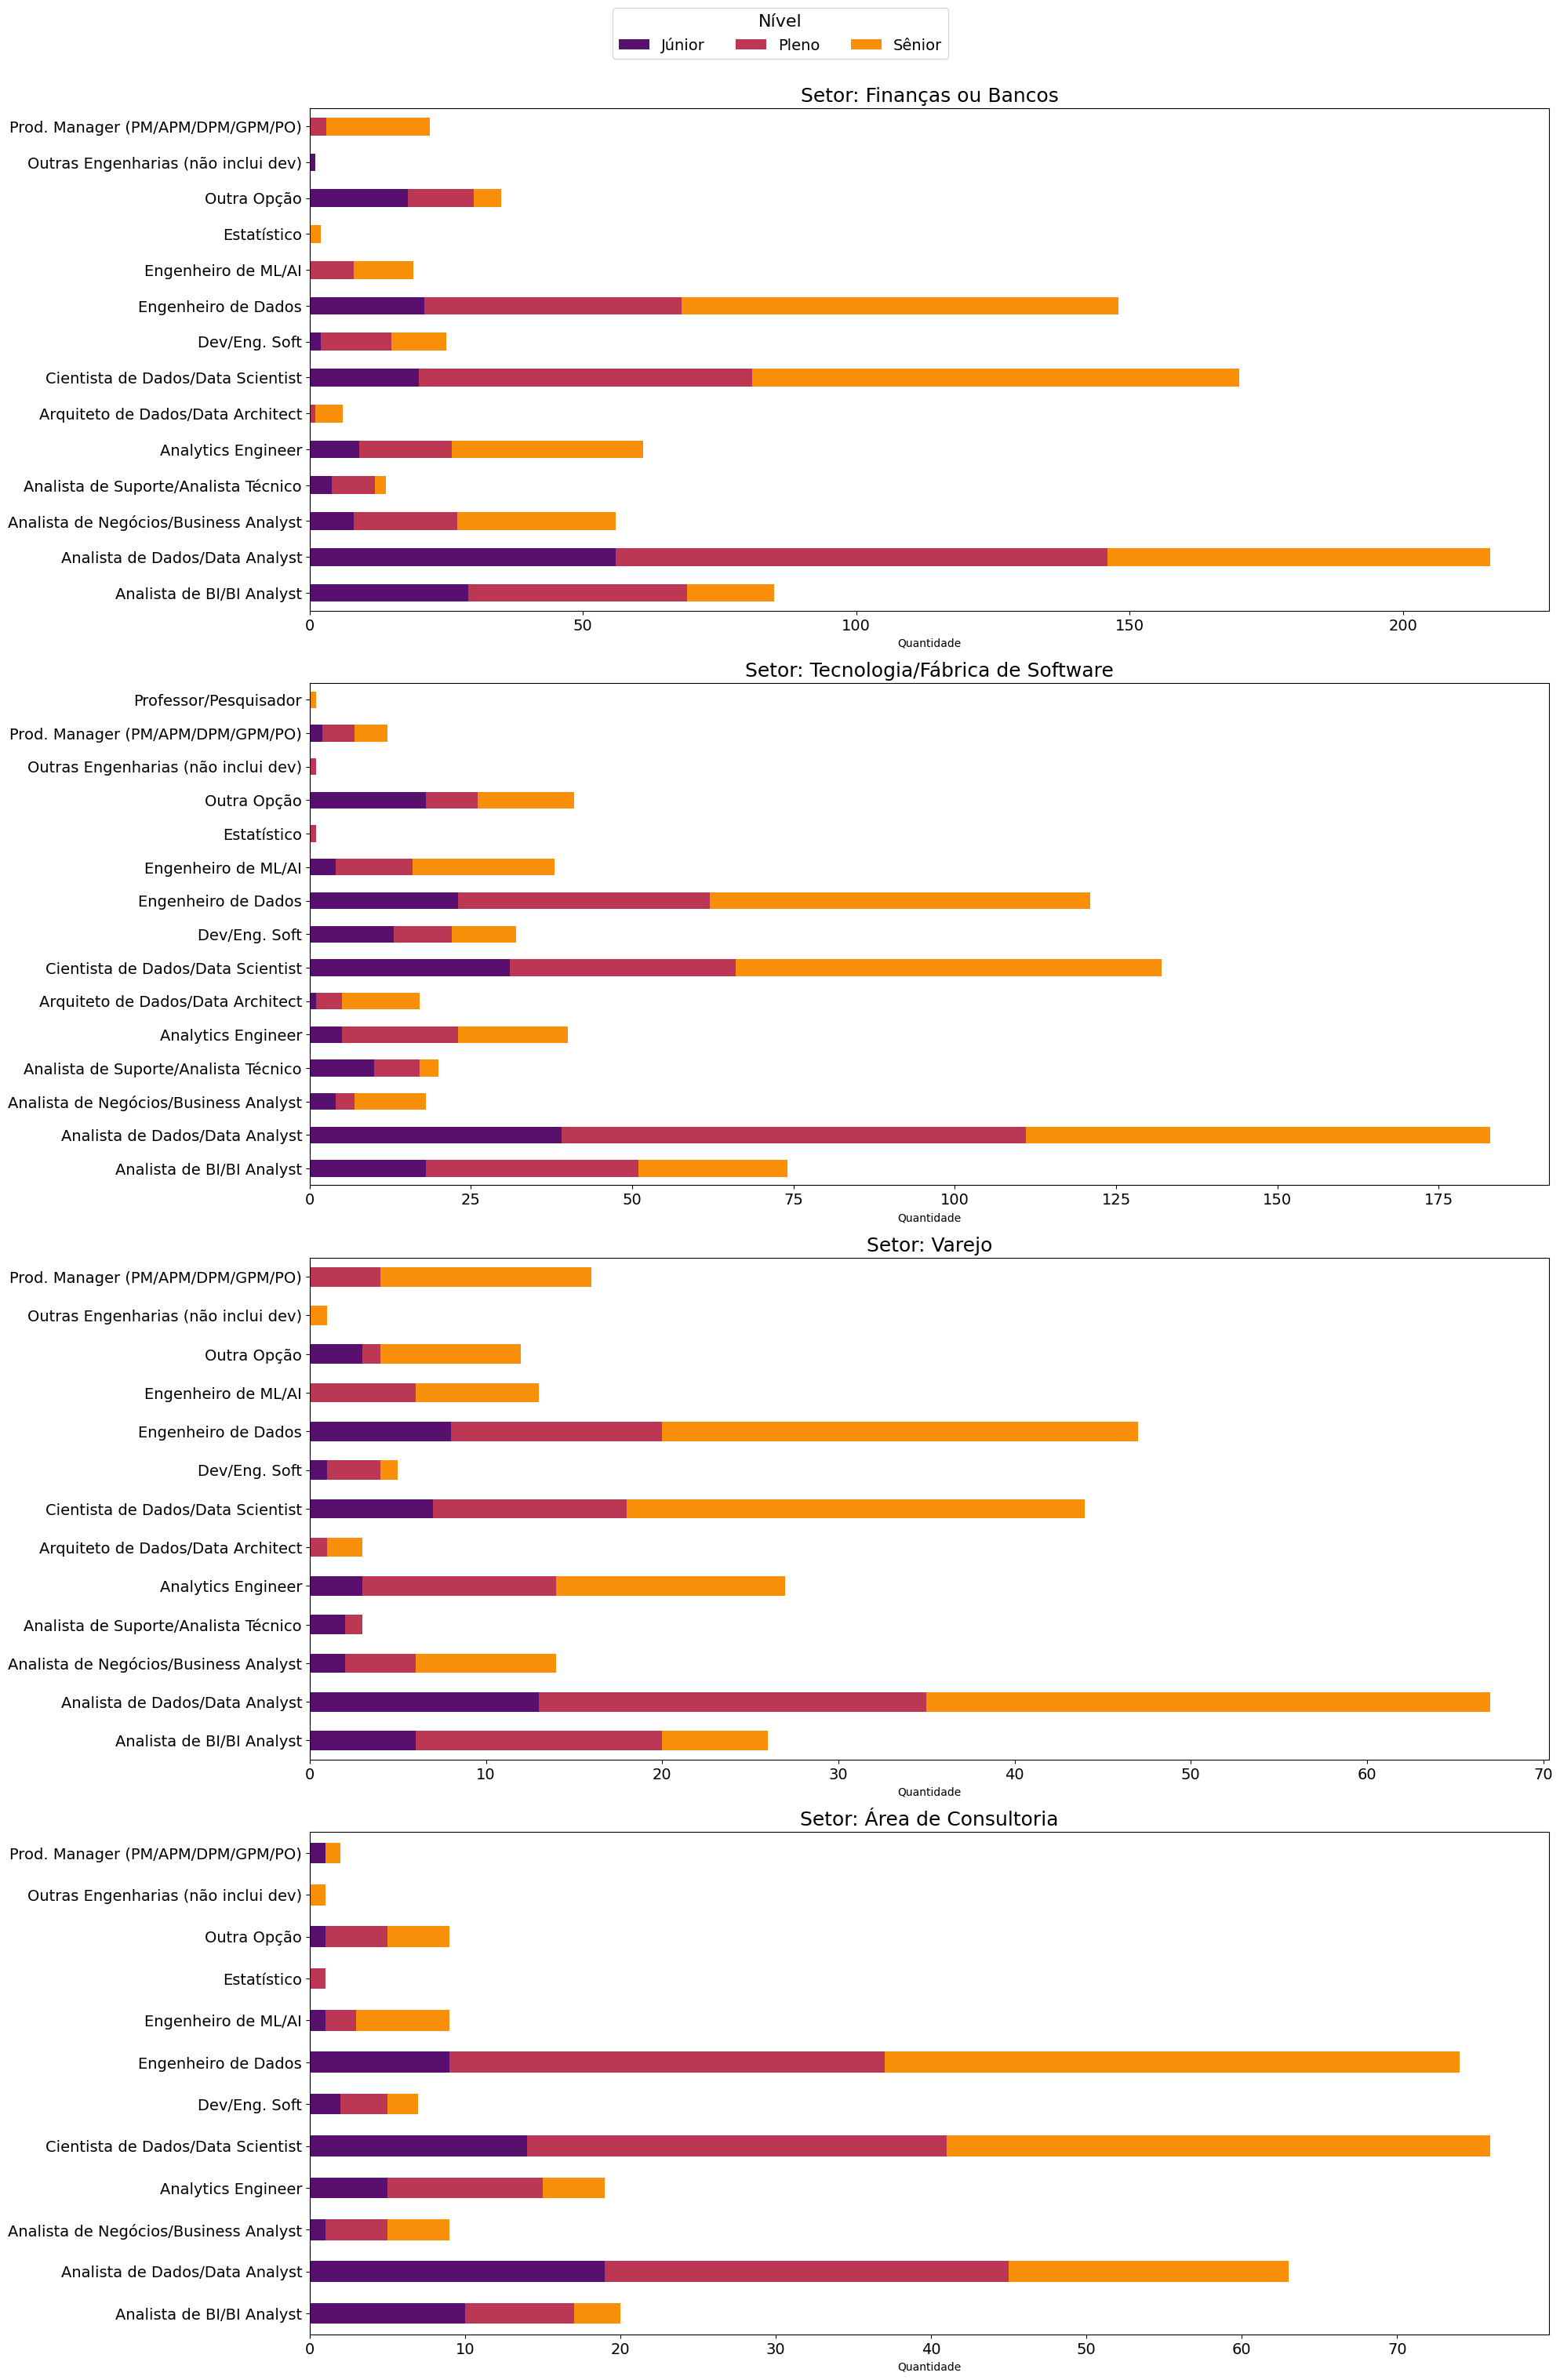

In [32]:
# Pivotar a tabela
df_pivot = df_grouped.pivot_table(
    index=['setor', 'cargo_atual'],
    columns='nivel',
    values='Contagem',
    fill_value=0
).reset_index()

# Selecionar os 4 maiores setores
fig, axes = plt.subplots(4, 1, figsize=(20, 32), sharex=False)
axes = axes.flatten()

# Gera 3 cores da paleta inferno
cores = sns.color_palette("inferno", n_colors=3).as_hex()

for i, setor in enumerate(maiores_setores):
    ax = axes[i]
    
    # Seleciona e prepara os dados do setor
    dados_setor = df_pivot[df_pivot['setor'] == setor].set_index('cargo_atual')
    dados_setor = dados_setor.drop(columns='setor', errors='ignore')
    dados_setor = dados_setor.reindex(columns=['Júnior', 'Pleno', 'Sênior'], fill_value=0)

    # Plotagem
    dados_setor.plot(
        kind='barh',
        stacked=True,
        ax=ax,
        color=cores,
        legend=False,
        fontsize=14
    )
    
    ax.set_title(f'Setor: {setor}', fontsize=18)
    ax.set_xlabel('Quantidade')
    ax.set_ylabel('')

# Legenda única
fig.legend(
    labels=['Júnior', 'Pleno', 'Sênior'],
    title='Nível',
    loc='upper center',
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    fontsize=14,
    title_fontsize=16
)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


O mercado de dados é majoritariamente composto por profissionais Pleno e Sênior, o que indica uma demanda por experiência.

Os cargos de Analista de Dados, Cientista de Dados e Engenheiro de Dados são os mais representativos.

Os setores de Finanças, Tecnologia e Consultoria concentram a maior parte dos profissionais de dados, especialmente os mais qualificados.

Há uma carência de profissionais Júnior, o que pode indicar barreiras de entrada ou uma necessidade de maior formação técnica.

A distribuição desigual entre setores e cargos sugere que algumas áreas ainda estão em fase de adoção de práticas orientadas por dados.

## 2.2 Proporção de Gestores

- Quantitativamente podemos observar nos graficos que o setor com a maior quantidade de gestores é o de Teccnologia e Software, o que faz sentido, pois é um dos maiores setores do ramo.
- Tambem é interessante verificar que nenhum gestor da industria farmaceutica foi identificado na análise

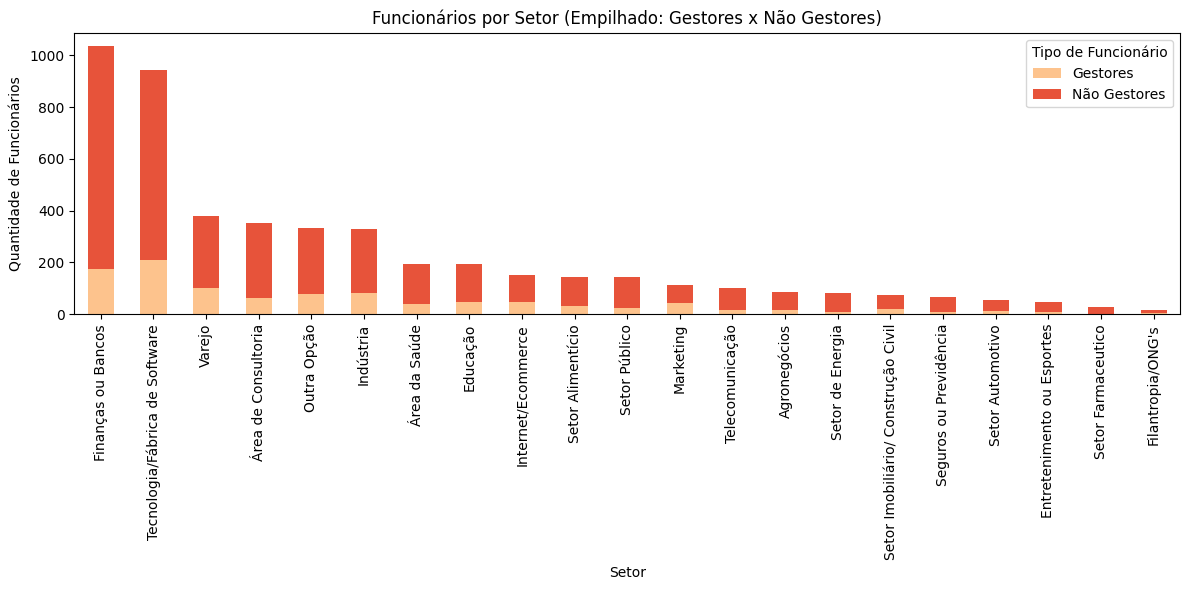

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar os dados
total_por_setor = df24.groupby("setor").size()
gestores_por_setor = df24[df24["atua_como_gestor"] == True].groupby("setor").size()

# 2. Criar DataFrame e calcular não-gestores
df_stack = pd.DataFrame({
    "Gestores": gestores_por_setor,
    "Não Gestores": total_por_setor - gestores_por_setor
}).fillna(0).astype(int)

# 3. Ordenar pelo total
df_stack["Total"] = df_stack["Gestores"] + df_stack["Não Gestores"]
df_stack = df_stack.sort_values("Total", ascending=False).drop(columns="Total")

# 4. Gerar 2 cores da paleta OrRd
cores = sns.color_palette("OrRd", n_colors=2).as_hex()

# 5. Plotar gráfico empilhado
df_stack.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=cores  # aplica paleta OrRd
)

plt.title("Funcionários por Setor (Empilhado: Gestores x Não Gestores)")
plt.ylabel("Quantidade de Funcionários")
plt.xlabel("Setor")
plt.xticks(rotation=90)
plt.legend(title="Tipo de Funcionário")
plt.tight_layout()
plt.show()

Para verificar proporcionalmente, vamos fazer uma distribuição absoluta em relação ao total de cada linha 

- Curiosamente o cenário ficou diferente pela primeira vez.
- Proporcionalmente os setores de Marketing, Internet/Ecommerce, Setor Imobiliário/ Construção Civil são os lideres na proporção de gestor para funcionários
- O setor do varejo segue constantemente no quarto lugar
- Já o setor financeiro tem uma das menores proporções. ~17% dos funcionarios da área de dados são gestores. O que é surpreendente já que é o setor com mais profissionais da área.

É compreensivel que setores com a menor quantidade de profissionais tenham mais gestores, uma vez que em equipes reduzidas as responsabilidades ficam concentradas em mais gente

In [34]:

df24["atua_como_gestor"] = df24["atua_como_gestor"].astype(str).str.lower().str.strip() == "true"

# Tabela de porcentagens por linha
tabela = pd.crosstab(df24['setor'], df24['atua_como_gestor'], normalize='index') * 100

# Ordenar por percentual de True
tabela = tabela.sort_values(by=True, ascending=False)

# Adicionar linha "Total"
linha_total = pd.DataFrame(tabela.mean()).T
linha_total.index = ['Total']
linha_total['Total'] = 100

# Adicionar coluna "Total"
tabela['Total'] = 100

# Concatenar
tabela_final = pd.concat([tabela, linha_total])

# Exibir
tabela_final.round(2)


atua_como_gestor                     False   True  Total
Marketing                            62.28  37.72    100
Internet/Ecommerce                   69.93  30.07    100
Setor Imobiliário/ Construção Civil  70.27  29.73    100
Varejo                               73.16  26.84    100
Filantropia/ONG's                    73.33  26.67    100
Indústria                            75.30  24.70    100
Educação                             76.29  23.71    100
Outra Opção                          76.81  23.19    100
Setor Alimentício                    76.92  23.08    100
Tecnologia/Fábrica de Software       77.60  22.40    100
Setor Automotivo                     78.18  21.82    100
Agronegócios                         78.57  21.43    100
Área da Saúde                        78.97  21.03    100
Área de Consultoria                  81.92  18.08    100
Setor Público                        82.39  17.61    100
Entretenimento ou Esportes           82.61  17.39    100
Finanças ou Bancos                   83.09  16.91    100
Telecomunicação                      84.47  15.53    100
Seguros ou Previdência               84.62  15.38    100
Setor de Energia                     89.02  10.98    100
Setor Farmaceutico                   92.59   7.41    100
Total                                78.49  21.51    100

## 2.3 Tempo Médio de Experiencia em Dados e TI

Para calcular mais facilmente vamos transformar essas variáveis categoricas em variáveis numéricas, considerando a média de cada faixa de tempo


| Faixa de tempo                         | Representação numérica (anos)               |
| -------------------------------------- | ------------------------------------------- |
| Menos de 1 ano                         | 0.5                                         |
| de 1 a 2 anos                          | 1.5                                         |
| de 3 a 4 anos                          | 3.5                                         |
| de 5 a 6 anos                          | 5.5                                         |
| de 7 a 10 anos                         | 8.5                                         |
| Mais de 10 anos                        | 12  |
| Não tenho experiência na área de dados | 0                                           |


In [35]:
# Dicionário de mapeamento
mapeamento_tempo = {
    'Menos de 1 ano': 0.5,
    'de 1 a 2 anos': 1.5,
    'de 3 a 4 anos': 3.5,
    'de 5 a 6 anos': 5.5,
    'de 7 a 10 anos': 8.5,
    'Mais de 10 anos': 12,
    'Não tenho experiência na área de dados': 0
}

# Criar nova coluna com valores numéricos
df24['experiencia_numerica'] = df24['tempo_de_experiencia_em_dados'].map(mapeamento_tempo)
df24['experiencia_numerica'].value_counts()  

experiencia_numerica
3.5     1386
1.5      944
5.5      830
12.0     585
8.5      542
0.5      346
0.0      230
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribuição do Tempo de Experiência por Setor')

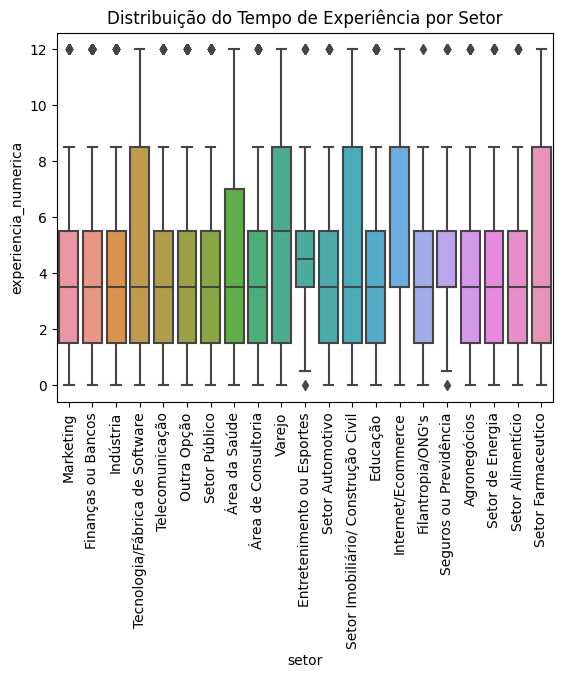

In [36]:
sns.boxplot(data=df24, x='setor', y='experiencia_numerica')
plt.xticks(rotation=90)
plt.title('Distribuição do Tempo de Experiência por Setor')


1. Média/mediana maior → mais senioridade no setor
Setores com a mediana mais alta (linha dentro da caixa) têm, em média, profissionais mais experientes.

Ex: Setor Farmacêutico e Área de Consultoria têm medianas mais altas → profissionais mais seniores.

2. Caixas maiores → maior diversidade de experiência
Se a caixa é muito alta, o setor tem profissionais com níveis variados de experiência, de iniciantes a seniores.

Ex: Área da Saúde, Consultoria, Entretenimento → ampla distribuição → times mais diversos.

3. Setores com caixa "baixa" → menos variação
Setores com caixas menores (curtas) indicam que a maioria dos profissionais tem experiência parecida.

Ex: Educação, ONGs, Setor Alimentício → possível concentração em cargos ou perfis específicos.

4. Outliers mostram perfis atípicos
A presença de muitos pontos fora do box indica casos excepcionais — alguém muito experiente num setor jovem, ou o contrário.

Ex: Finanças, Telecomunicação, ONGs → muitos outliers → talvez perfis especialistas ou transições de carreira.

Possíveis insights prontos com base no gráfico:
Setores mais seniores: Consultoria, Farmacêutico, Saúde → sugerem mais tempo para crescer na carreira.

Setores com entrada de novos profissionais: Educação, Ecommerce, ONGs, Setor Alimentício → medianas mais baixas.

Setores diversos: onde a caixa é grande → como Consultoria, Saúde, Entretenimento, sugerem times com perfis mistos.

## 2.4 Distribuição das áreas de formação por setor

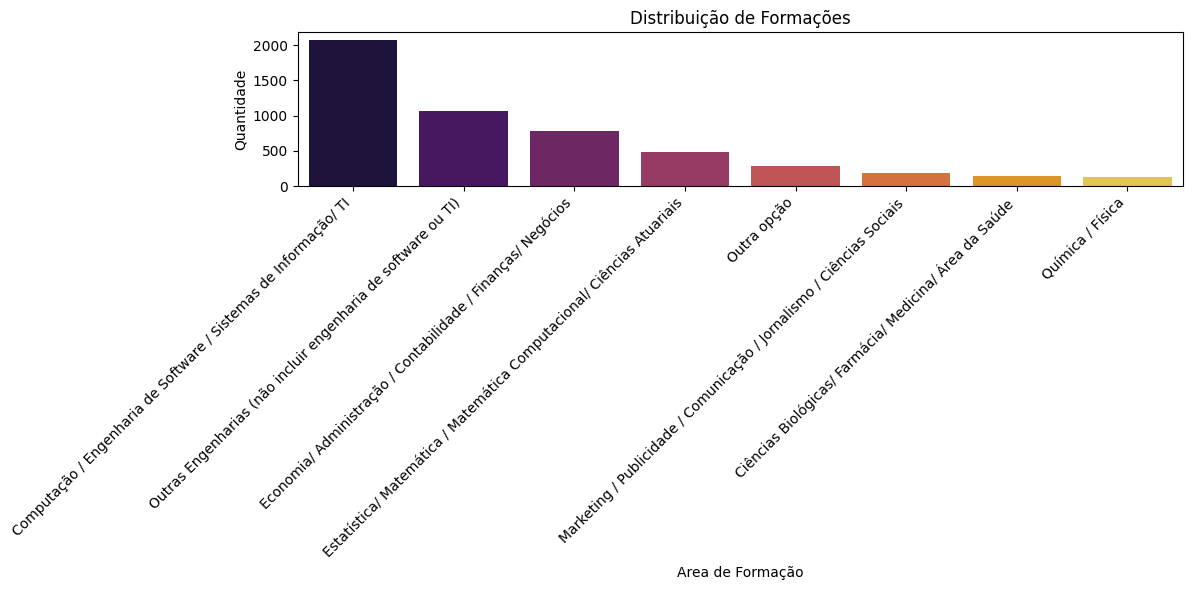

In [37]:
formacao = df24['área_de_formação'].value_counts()  

df_plot = formacao.reset_index()
df_plot.columns = ['área_de_formação', 'quantidade']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='área_de_formação', y='quantidade', palette='inferno')

plt.title('Distribuição de Formações')
plt.xlabel('Area de Formação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
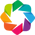

:Layout
   .Sankey.I  :Sankey   [source,target]   (value)
   .Sankey.II :Sankey   [source,target]   (value)

In [38]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')  # Ativa extensão do bokeh no holoviews

# Top 8 formações
formacoes_unicas = df24['área_de_formação'].value_counts().index[:8]

# Dividir em dois grupos
grupo1 = formacoes_unicas[:4]
grupo2 = formacoes_unicas[4:]

def sankey_holoviews(formacoes, titulo):
    df_sankey = df24[df24['área_de_formação'].isin(formacoes)]
    df_grouped = df_sankey.groupby(['área_de_formação', 'setor']).size().reset_index(name='value')
    df_grouped.columns = ['source', 'target', 'value']

    sankey = hv.Sankey(df_grouped)
    sankey.opts(
        opts.Sankey(
            title=titulo,
            width=800,
            height=600,
            node_width=10,
            node_padding=7,
            label_position='left',
            labels='index',
            cmap='Category20',
            edge_color='source'
        )
    ).opts(tools=['hover'])

    return sankey

# Exibir os dois gráficos interativos
sankey1 = sankey_holoviews(grupo1, "Sankey - Grupo 1 de Formações")
sankey2 = sankey_holoviews(grupo2, "Sankey - Grupo 2 de Formações")

(sankey1 + sankey2).cols(1)



1. Tecnologia é o destino mais comum, independentemente da formação
Isso pode indicar a força do setor tecnológico como absorvedor de talentos em dados.

2. Formações não técnicas também estão entrando na área de dados
“Economia”, “Administração” e até mesmo “Saúde” estão gerando profissionais que atuam em setores como consultoria, educação e saúde.

3. Oportunidade para programas de transição de carreira
Como há migração de áreas diversas para dados, existe potencial de cursos ou programas para preparar esses perfis.

4. Possível relação entre formação e setor
Ex: Estatística e Matemática migrando para setores como bancos, seguros e consultoria sugere que setores mais analíticos absorvem essas formações.

# 3 Modelos de trabalho por setor

## 3.1 Distribuição dos modelos de trabalho atuais

In [39]:
modelo_renom = {
    'Modelo híbrido com dias fixos de trabalho presencial': 'Modelo híbrido',
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':'Modelo híbrido flexível'
}

dfmodelos = df24

dfmodelos.loc[:, 'modelo_de_trabalho_atual'] = dfmodelos['modelo_de_trabalho_atual'].replace(modelo_renom)
dfmodelos.loc[:, 'modelo_de_trabalho_ideal'] = dfmodelos['modelo_de_trabalho_ideal'].replace(modelo_renom)

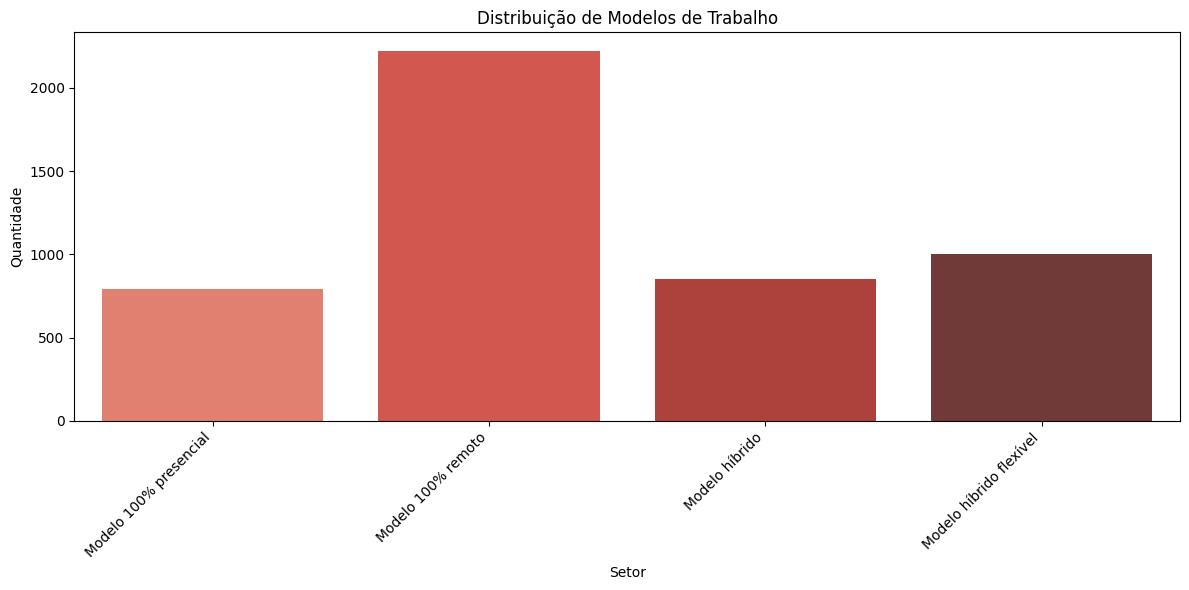

In [40]:
modelos = dfmodelos.groupby('modelo_de_trabalho_atual').size()
modelos

df_plot = modelos.reset_index()
df_plot.columns = ['setor', 'quantidade']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='setor', y='quantidade', palette='Reds_d')

plt.title('Distribuição de Modelos de Trabalho')
plt.xlabel('Setor')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# Tabela de frequência absoluta
tabela_abs = pd.crosstab(dfmodelos['setor'], dfmodelos['modelo_de_trabalho_atual']).reindex(fill_value=0)

# Tabela de percentual por linha (cada setor soma 100%)
tabela_percent = pd.crosstab(dfmodelos['setor'], dfmodelos['modelo_de_trabalho_atual'], normalize='index') * 100

# Adiciona coluna "Total" (será sempre 100, exceto em possíveis linhas vazias)
tabela_percent['Total'] = tabela_percent.sum(axis=1)

# Ordena pela mesma ordem da tabela_final anterior
ordem_setores = tabela_abs.sum(axis=1).sort_values(ascending=False).index
tabela_ordenada = tabela_percent.loc[ordem_setores]

# Exibir resultado com 2 casas decimais
tabela_ordenada.round(2)


modelo_de_trabalho_atual             Modelo 100% presencial  \
setor                                                         
Finanças ou Bancos                                    15.07   
Tecnologia/Fábrica de Software                         7.11   
Varejo                                                11.32   
Área de Consultoria                                    3.95   
Outra Opção                                           26.51   
Indústria                                             27.74   
Área da Saúde                                         29.74   
Educação                                              24.74   
Internet/Ecommerce                                     9.80   
Setor Alimentício                                     11.19   
Setor Público                                         42.96   
Marketing                                              9.65   
Telecomunicação                                       12.62   
Agronegócios                                          33.33   
Setor de Energia                                      23.17   
Setor Imobiliário/ Construção Civil                   32.43   
Seguros ou Previdência                                 7.69   
Setor Automotivo                                      36.36   
Entretenimento ou Esportes                            15.22   
Setor Farmaceutico                                    18.52   
Filantropia/ONG's                                     20.00   

modelo_de_trabalho_atual             Modelo 100% remoto  Modelo híbrido  \
setor                                                                     
Finanças ou Bancos                                38.16           23.19   
Tecnologia/Fábrica de Software                    61.57           10.83   
Varejo                                            60.26           13.16   
Área de Consultoria                               67.51           10.73   
Outra Opção                                       41.57           16.87   
Indústria                                         35.06           18.60   
Área da Saúde                                     33.33           21.54   
Educação                                          37.63           20.62   
Internet/Ecommerce                                42.48           13.07   
Setor Alimentício                                 48.25           15.38   
Setor Público                                     21.13           25.35   
Marketing                                         47.37           17.54   
Telecomunicação                                   38.83           22.33   
Agronegócios                                      33.33           13.10   
Setor de Energia                                  13.41           31.71   
Setor Imobiliário/ Construção Civil               35.14            9.46   
Seguros ou Previdência                            18.46           44.62   
Setor Automotivo                                  18.18           21.82   
Entretenimento ou Esportes                        54.35           10.87   
Setor Farmaceutico                                51.85           22.22   
Filantropia/ONG's                                 26.67           26.67   

modelo_de_trabalho_atual             Modelo híbrido flexível  Total  
setor                                                                
Finanças ou Bancos                                     23.57  100.0  
Tecnologia/Fábrica de Software                         20.49  100.0  
Varejo                                                 15.26  100.0  
Área de Consultoria                                    17.80  100.0  
Outra Opção                                            15.06  100.0  
Indústria                                              18.60  100.0  
Área da Saúde                                          15.38  100.0  
Educação                                               17.01  100.0  
Internet/Ecommerce                                     34.64  100.0  
Setor Alimentício                                     

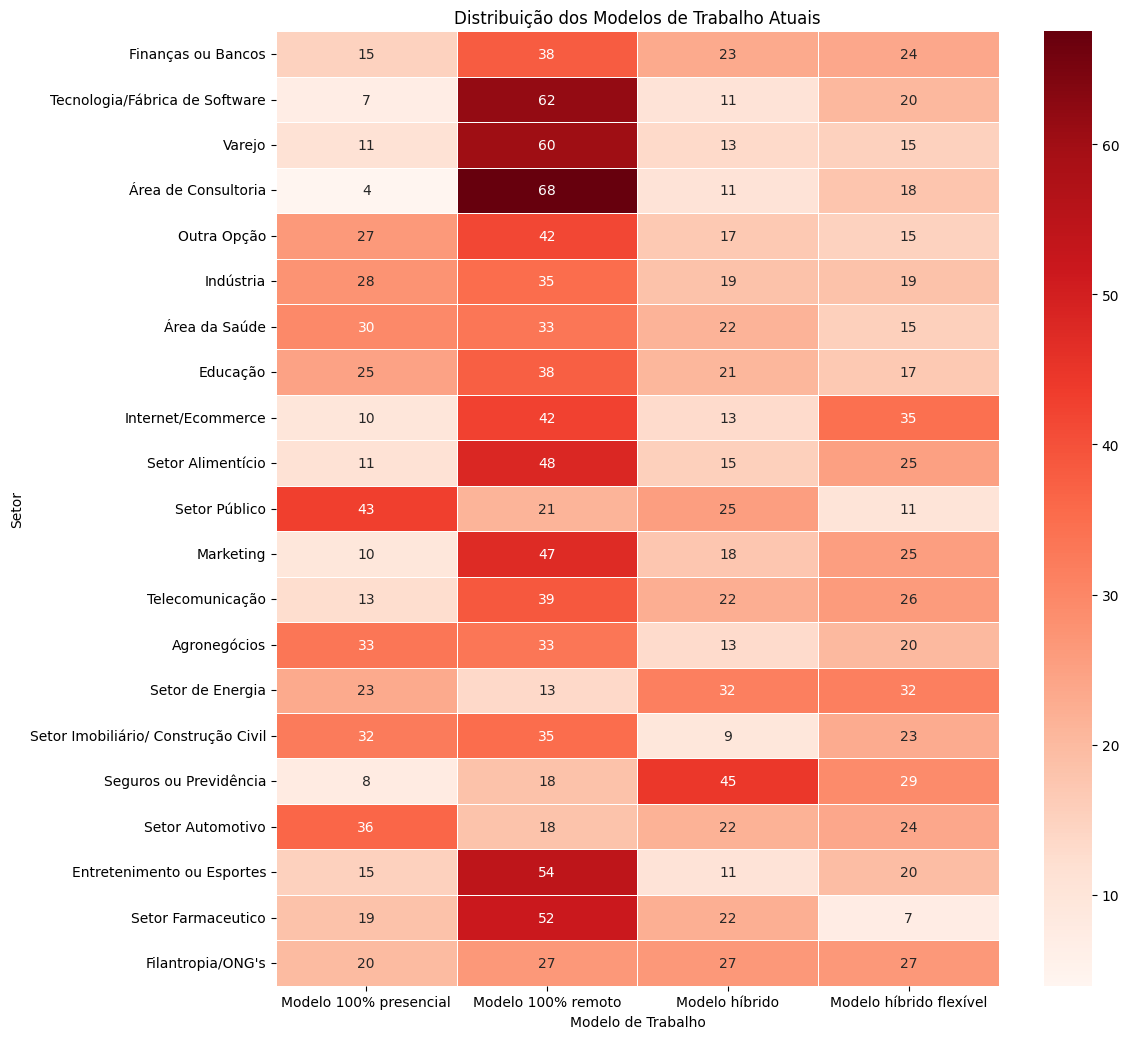

In [42]:
tabela_ordenada2 = tabela_ordenada.drop(columns='Total')
#tabela_ordenada2 = tabela_ordenada2.drop('Total')

plt.figure(figsize=(12, len(tabela_ordenada2) * 0.5))  # Altura ajustada pela quantidade de linhas

sns.heatmap(tabela_ordenada2, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)

plt.title("Distribuição dos Modelos de Trabalho Atuais")
plt.xlabel("Modelo de Trabalho")
plt.ylabel("Setor")
plt.tight_layout()
plt.show()

## 3.2 Modelos de trabalho ideais declarados

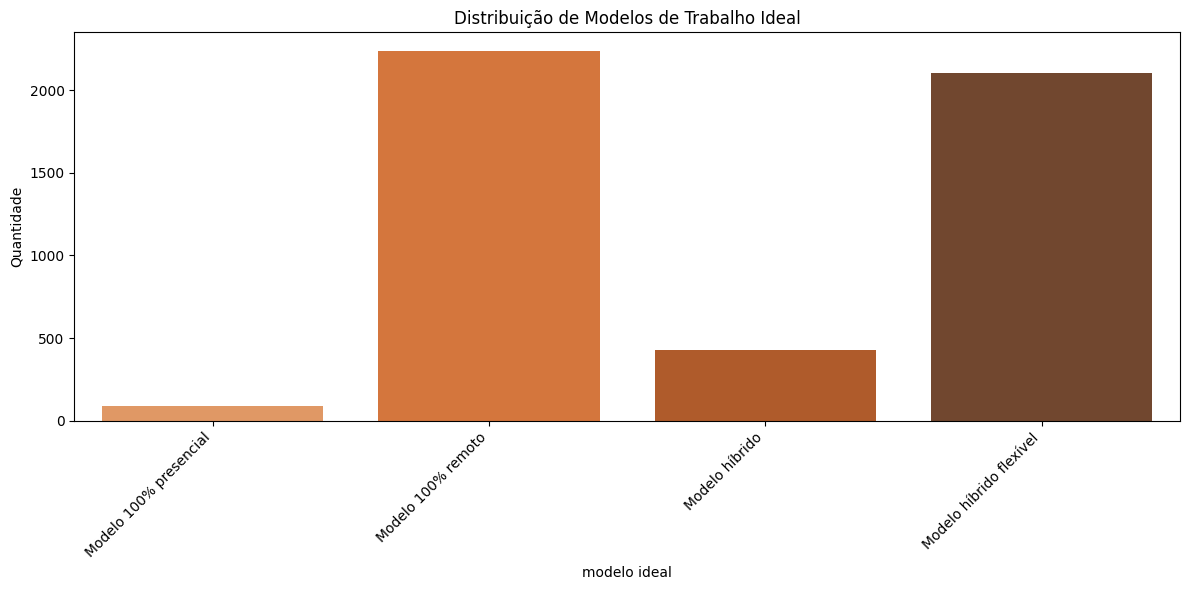

In [43]:
modelos = dfmodelos.groupby('modelo_de_trabalho_ideal').size()
modelos

df_plot = modelos.reset_index()
df_plot.columns = ['modelo_de_trabalho_ideal', 'quantidade']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='modelo_de_trabalho_ideal', y='quantidade', palette='Oranges_d')

plt.title('Distribuição de Modelos de Trabalho Ideal')
plt.xlabel('modelo ideal')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
# Tabela de frequência absoluta
tabela_abs = pd.crosstab(dfmodelos['setor'], dfmodelos['modelo_de_trabalho_ideal']).reindex(fill_value=0)

# Tabela de percentual por linha (cada setor soma 100%)
tabela_percent = pd.crosstab(dfmodelos['setor'], dfmodelos['modelo_de_trabalho_ideal'], normalize='index') * 100

# Adiciona coluna "Total" (será sempre 100, exceto em possíveis linhas vazias)
tabela_percent['Total'] = tabela_percent.sum(axis=1)

# Ordena pela mesma ordem da tabela_final anterior
ordem_setores = tabela_abs.sum(axis=1).sort_values(ascending=False).index
tabela_ordenada_ideal = tabela_percent.loc[ordem_setores]

# Exibir resultado com 2 casas decimais
tabela_ordenada_ideal.round(2)

modelo_de_trabalho_ideal             Modelo 100% presencial  \
setor                                                         
Finanças ou Bancos                                     2.80   
Tecnologia/Fábrica de Software                         1.49   
Varejo                                                 0.26   
Área de Consultoria                                    0.56   
Outra Opção                                            0.90   
Indústria                                              1.22   
Área da Saúde                                          3.59   
Educação                                               3.09   
Internet/Ecommerce                                     1.31   
Setor Alimentício                                      2.10   
Setor Público                                          3.52   
Marketing                                              4.39   
Telecomunicação                                        2.91   
Agronegócios                                           2.38   
Setor de Energia                                       0.00   
Setor Imobiliário/ Construção Civil                    4.05   
Seguros ou Previdência                                 0.00   
Setor Automotivo                                       3.64   
Entretenimento ou Esportes                             0.00   
Setor Farmaceutico                                     0.00   
Filantropia/ONG's                                      0.00   

modelo_de_trabalho_ideal             Modelo 100% remoto  Modelo híbrido  \
setor                                                                     
Finanças ou Bancos                                42.90           10.43   
Tecnologia/Fábrica de Software                    51.06            5.84   
Varejo                                            59.21            5.79   
Área de Consultoria                               55.65            4.24   
Outra Opção                                       46.69           11.45   
Indústria                                         39.63            9.76   
Área da Saúde                                     39.49           12.82   
Educação                                          46.91           13.92   
Internet/Ecommerce                                45.75            7.19   
Setor Alimentício                                 49.65            5.59   
Setor Público                                     35.92           14.79   
Marketing                                         42.11            7.89   
Telecomunicação                                   34.95            2.91   
Agronegócios                                      32.14           17.86   
Setor de Energia                                  37.80            8.54   
Setor Imobiliário/ Construção Civil               33.78           17.57   
Seguros ou Previdência                            30.77            6.15   
Setor Automotivo                                  29.09           16.36   
Entretenimento ou Esportes                        47.83            8.70   
Setor Farmaceutico                                48.15            7.41   
Filantropia/ONG's                                 53.33           20.00   

modelo_de_trabalho_ideal             Modelo híbrido flexível  Total  
setor                                                                
Finanças ou Bancos                                     43.86  100.0  
Tecnologia/Fábrica de Software                         41.61  100.0  
Varejo                                                 34.74  100.0  
Área de Consultoria                                    39.55  100.0  
Outra Opção                                            40.96  100.0  
Indústria                                              49.39  100.0  
Área da Saúde                                          44.10  100.0  
Educação                                               36.08  100.0  
Internet/Ecommerce                                     45.75  100.0  
Setor Alimentício                                     

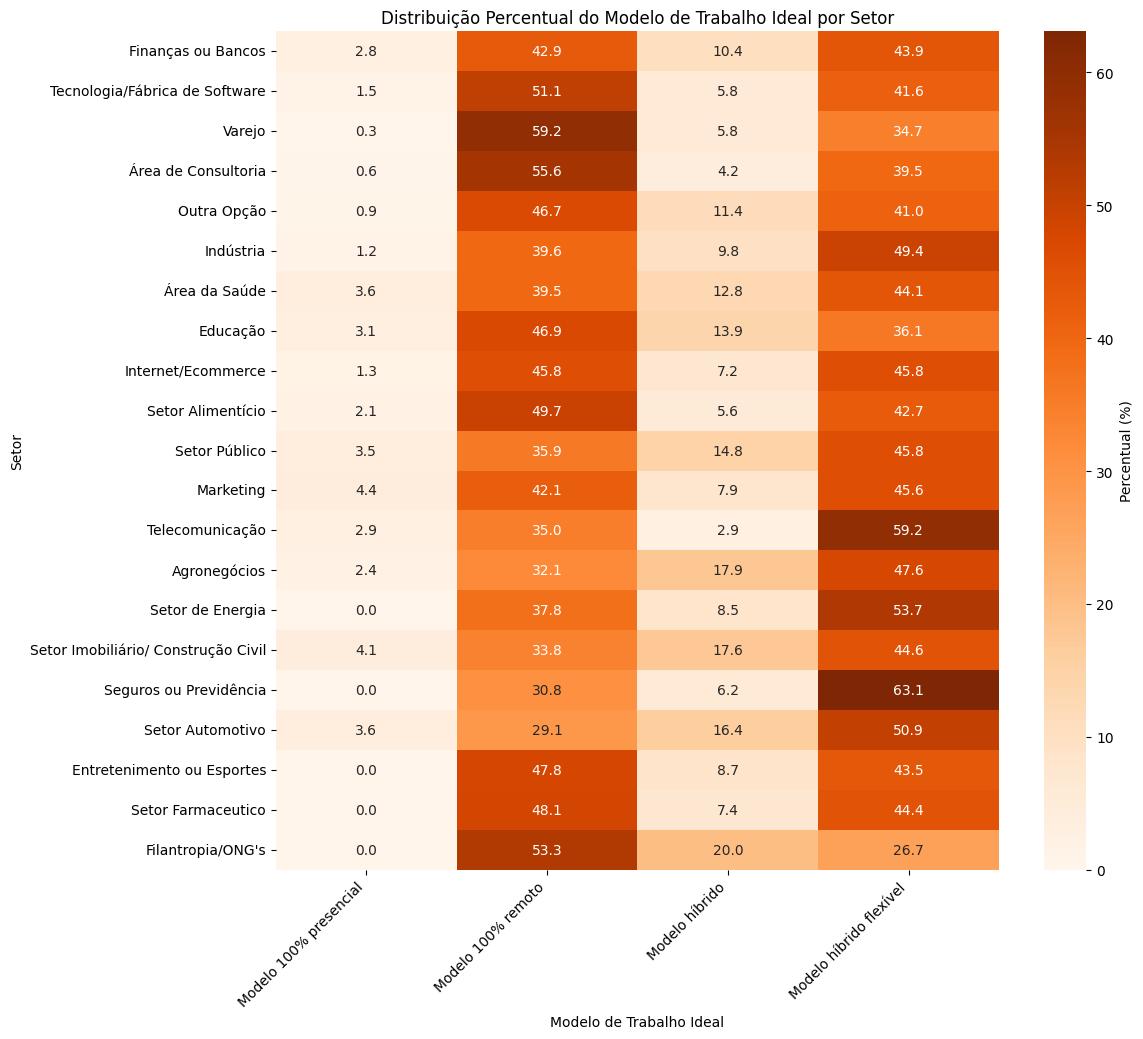

In [45]:
# Remover a coluna 'Total' (ela sempre soma 100, não é informativa para o heatmap)
heatmap_data = tabela_ordenada_ideal.drop(columns='Total')

# Plotar o heatmap
plt.figure(figsize=(12, len(tabela_ordenada_ideal) * 0.5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='Oranges', cbar_kws={'label': 'Percentual (%)'})

plt.title('Distribuição Percentual do Modelo de Trabalho Ideal por Setor')
plt.xlabel('Modelo de Trabalho Ideal')
plt.ylabel('Setor')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 3.3 Comparativo entre modelo atual e ideal

### 3.3.1 Gaps entre modelo atual e ideal

Vamos verificar qual a diferença entre o que as pessoas vivenciam atualmente e o que prefeririam.

Vamos subtrair diretamente uma da outra (ideal - atual) para cada modelo de trabalho, mantendo a mesma ordem de setores:

In [46]:
# Remove coluna 'Total' antes de calcular o gap
tabela_atual = tabela_ordenada.drop(columns='Total')
tabela_ideal = tabela_ordenada_ideal.drop(columns='Total')

# Calcula a diferença entre o ideal e o atual
tabela_gap = tabela_ideal - tabela_atual

# Exibe o gap arredondado
tabela_gap.round(2)


modelo_de_trabalho_ideal             Modelo 100% presencial  \
setor                                                         
Finanças ou Bancos                                   -12.27   
Tecnologia/Fábrica de Software                        -5.63   
Varejo                                               -11.05   
Área de Consultoria                                   -3.39   
Outra Opção                                          -25.60   
Indústria                                            -26.52   
Área da Saúde                                        -26.15   
Educação                                             -21.65   
Internet/Ecommerce                                    -8.50   
Setor Alimentício                                     -9.09   
Setor Público                                        -39.44   
Marketing                                             -5.26   
Telecomunicação                                       -9.71   
Agronegócios                                         -30.95   
Setor de Energia                                     -23.17   
Setor Imobiliário/ Construção Civil                  -28.38   
Seguros ou Previdência                                -7.69   
Setor Automotivo                                     -32.73   
Entretenimento ou Esportes                           -15.22   
Setor Farmaceutico                                   -18.52   
Filantropia/ONG's                                    -20.00   

modelo_de_trabalho_ideal             Modelo 100% remoto  Modelo híbrido  \
setor                                                                     
Finanças ou Bancos                                 4.73          -12.75   
Tecnologia/Fábrica de Software                   -10.51           -4.99   
Varejo                                            -1.05           -7.37   
Área de Consultoria                              -11.86           -6.50   
Outra Opção                                        5.12           -5.42   
Indústria                                          4.57           -8.84   
Área da Saúde                                      6.15           -8.72   
Educação                                           9.28           -6.70   
Internet/Ecommerce                                 3.27           -5.88   
Setor Alimentício                                  1.40           -9.79   
Setor Público                                     14.79          -10.56   
Marketing                                         -5.26           -9.65   
Telecomunicação                                   -3.88          -19.42   
Agronegócios                                      -1.19            4.76   
Setor de Energia                                  24.39          -23.17   
Setor Imobiliário/ Construção Civil               -1.35            8.11   
Seguros ou Previdência                            12.31          -38.46   
Setor Automotivo                                  10.91           -5.45   
Entretenimento ou Esportes                        -6.52           -2.17   
Setor Farmaceutico                                -3.70          -14.81   
Filantropia/ONG's                                 26.67           -6.67   

modelo_de_trabalho_ideal             Modelo híbrido flexível  
setor                                                         
Finanças ou Bancos                                     20.29  
Tecnologia/Fábrica de Software                         21.13  
Varejo                                                 19.47  
Área de Consultoria                                    21.75  
Outra Opção                                            25.90  
Indústria                                              30.79  
Área da Saúde                                          28.72  
Educação                                               19.07  
Internet/Ecommerce                                     11.11  
Setor Alimentício                                      17.48  
Setor Público                                          35.21  
Marke

### Heatmap de Gaps por Setor e Modelo de Trabalho

Valores positivos indicam preferência maior do que a realidade atual.

- O maior gap para modelo híbrido flexível está no Setor Público (+35,2%), seguido por Seguros e Saúde.

- O maior gap negativo para o modelo 100% presencial também está no Setor Público (-39,4%), indicando forte rejeição.

- O setor de Energia (+24,4%) e Filantropia/ONGs (+26,7%) são os que mais preferem o modelo 100% remoto.

- Seguros ou Previdência têm forte gap negativo no modelo híbrido tradicional (-38,5%).

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



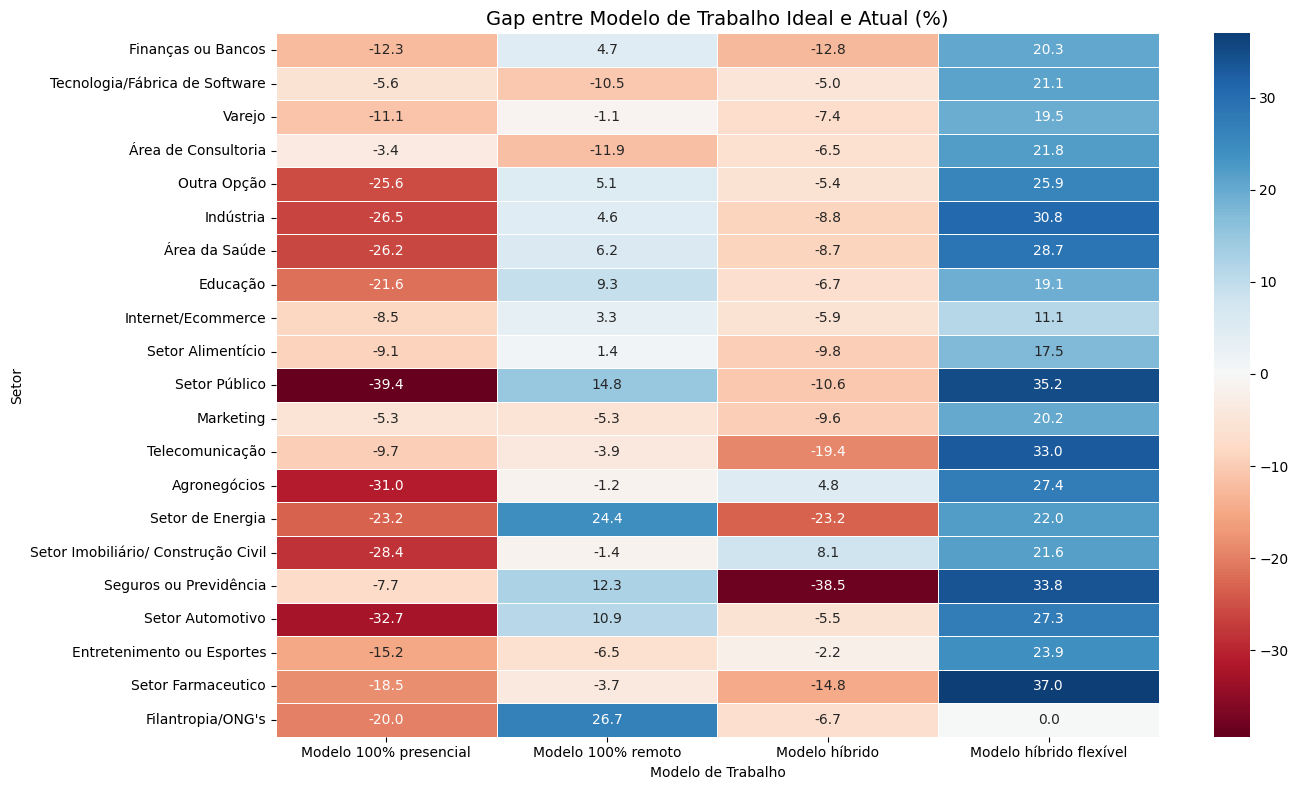

In [47]:
plt.figure(figsize=(14,8))
sns.heatmap(tabela_gap.round(1), annot=True, fmt='.1f', cmap='RdBu', center=0, linewidths=.5)

plt.title('Gap entre Modelo de Trabalho Ideal e Atual (%)', fontsize=14)
plt.xlabel('Modelo de Trabalho')
plt.ylabel('Setor')
plt.tight_layout()
plt.show()


### Gráfico de Barras Horizontais – Gap para Modelo 100% Remoto

Filantropia/ONGs, Setor de Energia, Setor Público e Seguros têm os maiores gaps positivos → seus profissionais desejam mais o modelo remoto do que têm atualmente.

Área de Consultoria, Tecnologia, e Entretenimento já estão relativamente mais alinhados com o remoto.

Setores como Consultoria e Marketing têm gap negativo, o que indica que esses setores já oferecem mais remoto do que o desejado, ou que há saturação.

<Axes: ylabel='setor'>

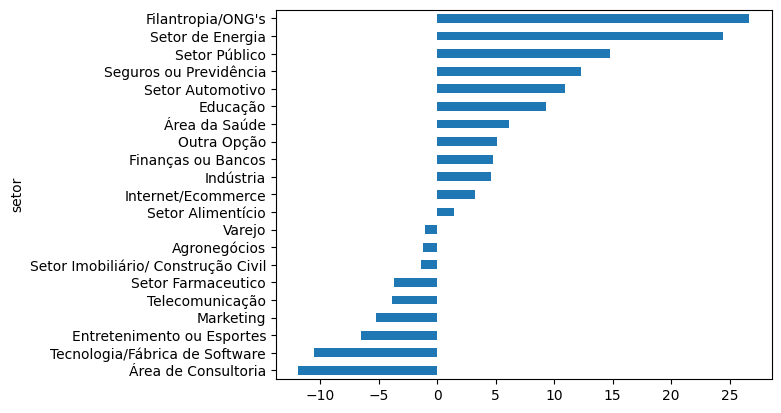

In [48]:
tabela_gap['Modelo 100% remoto'].sort_values().plot(kind='barh')


### Gráfico de Barras Horizontais – Gap para Modelo 100% Presencial

Todos os setores têm gap negativo, reforçando que o modelo 100% presencial é o menos desejado.

Os setores com maior rejeição são:

Setor Público (-39,4%)

Automotivo (-32,7%)

Agronegócios, Construção Civil, Saúde, Indústria

Consultoria e Marketing são os setores com menor rejeição, ainda assim negativa (~ -3 a -5%).



<Axes: ylabel='setor'>

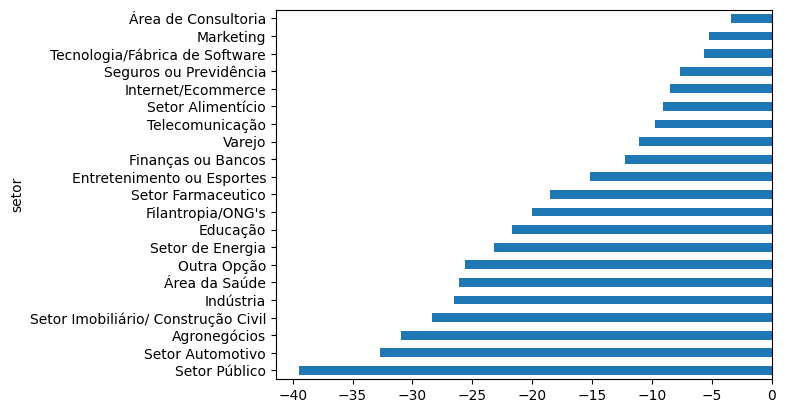

In [49]:
tabela_gap['Modelo 100% presencial'].sort_values().plot(kind='barh')


### Gráfico de Barras Horizontais – Gap para Modelo Híbrido

A maioria dos setores tem gap negativo, o que pode indicar:

O híbrido está sendo praticado mais do que o desejado.

Ou que o modelo adotado não é o "híbrido ideal".

Seguros ou Previdência (-38,5%) e Energia (-23,2%) têm os maiores gaps negativos, sugerindo que esses setores adotam o híbrido mais do que o idealizado pelos profissionais.

Apenas Construção Civil (+8,1%) e Agro (+4,8%) mostram gap positivo — ou seja, desejam mais híbrido do que têm.

<Axes: ylabel='setor'>

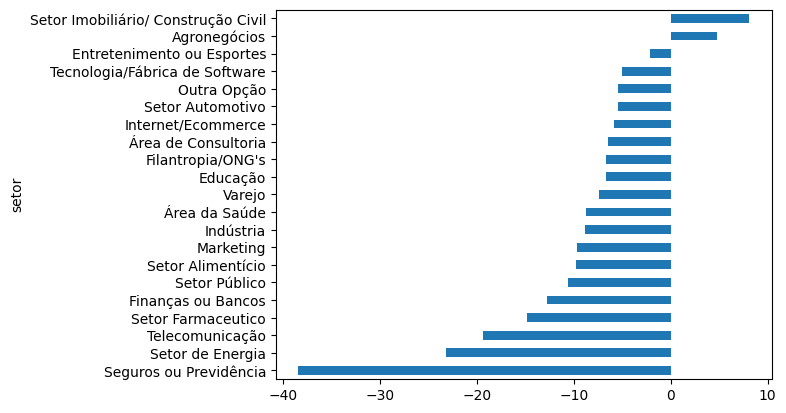

In [50]:
tabela_gap['Modelo híbrido'].sort_values().plot(kind='barh')

### Gráfico de Barras Horizontais – Gap para Modelo Híbrido Flexível

Todos os setores (exceto ONGs) mostram gap positivo, indicando grande preferência por modelos flexíveis.

Setores com maior gap:

Farmacêutico (+37,9%)

Setor Público (+35,2%)

Seguros (+33,8%)

Telecomunicações e Indústria

Até setores tradicionalmente presenciais (como Automotivo, Agro e Construção Civil) apresentam preferência clara por maior flexibilidade.

<Axes: ylabel='setor'>

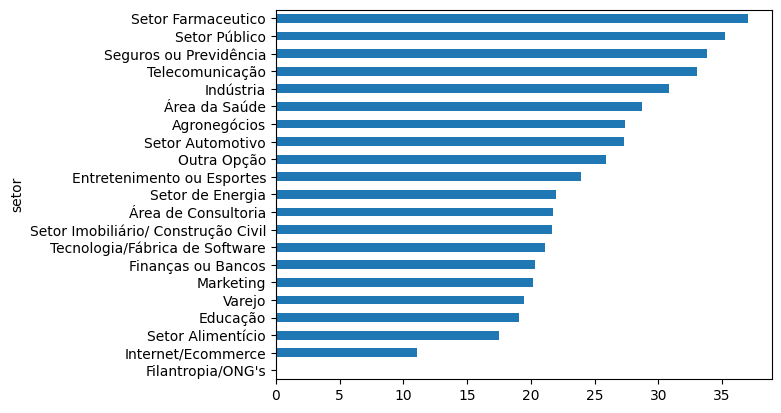

In [51]:
tabela_gap['Modelo híbrido flexível'].sort_values().plot(kind='barh')

Há uma forte rejeição ao modelo 100% presencial em praticamente todos os setores.

O modelo híbrido tradicional não atende completamente às expectativas, com diversos setores demonstrando insatisfação.

O modelo mais desejado é o híbrido flexível, especialmente em setores como Saúde, Público, Seguros, Indústria e Tecnologia.

Setores como Energia e ONGs mostram preferência marcante pelo modelo 100% remoto, enquanto outros já atingiram o equilíbrio (Consultoria, Marketing).

Essa análise revela uma clara tendência dos profissionais por autonomia e flexibilidade, mesmo em setores historicamente presenciais, apontando uma mudança estrutural nas relações de trabalho.

# 4 Salario por setor

## 4.1 Distribuição das Faixas Salariais

- A maior concentração de profissionais está na faixa de RS 12.001 a R$ 16.000/mês, com mais de 1.000 registros.

- Há uma distribuição assimétrica à direita, indicando que menos pessoas estão nas faixas mais altas (acima de R$ 20.000).

- Há também uma base significativa entre RS 6.000 e R$ 12.000, o que sugere que a maioria dos salários está concentrada na faixa intermediária-superior.

- Pouca gente recebe menos de R$ 2.000, indicando possível filtragem por cargos mais qualificados.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



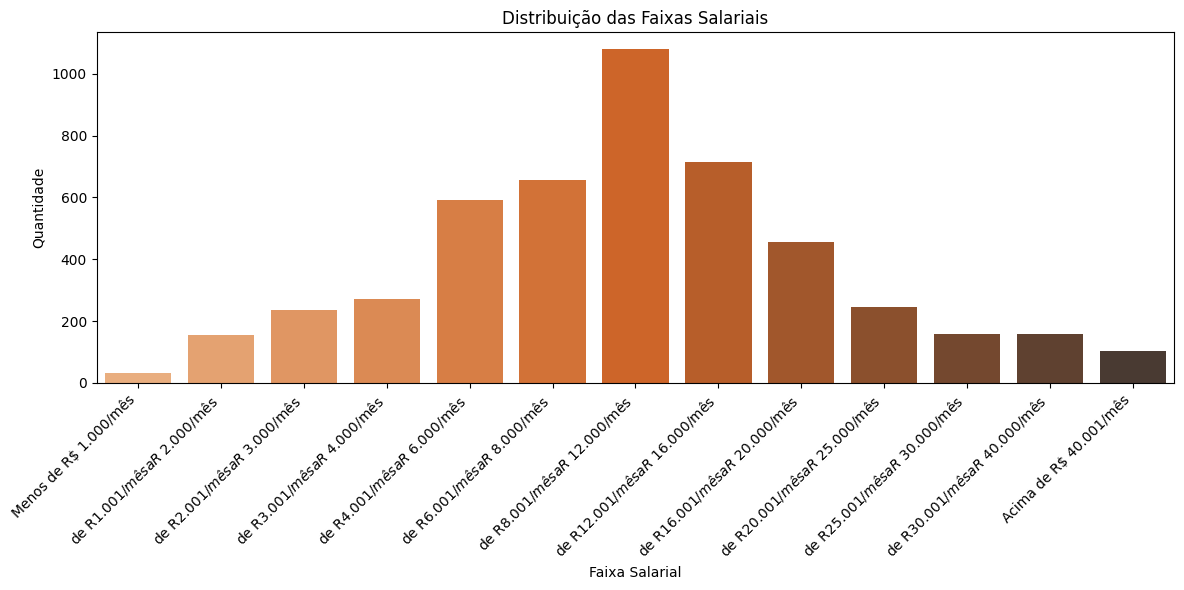

In [52]:
faixa = df24.groupby('faixa_salarial',observed=True).size()
faixa

ordem_salarios = [
    'Menos de R$ 1.000/mês',
    'de R$ 1.001/mês a R$ 2.000/mês',
    'de R$ 2.001/mês a R$ 3.000/mês',
    'de R$ 3.001/mês a R$ 4.000/mês',
    'de R$ 4.001/mês a R$ 6.000/mês',
    'de R$ 6.001/mês a R$ 8.000/mês',
    'de R$ 8.001/mês a R$ 12.000/mês',
    'de R$ 12.001/mês a R$ 16.000/mês',
    'de R$ 16.001/mês a R$ 20.000/mês',
    'de R$ 20.001/mês a R$ 25.000/mês',
    'de R$ 25.001/mês a R$ 30.000/mês',
    'de R$ 30.001/mês a R$ 40.000/mês',
    'Acima de R$ 40.001/mês'
]

df_plot = faixa.reset_index()
df_plot.columns = ['faixa_salarial', 'quantidade']

# Definir a ordem como categoria ordenada
df_plot['faixa_salarial'] = pd.Categorical(df_plot['faixa_salarial'], categories=ordem_salarios, ordered=True)

# Ordenar o DataFrame com base na ordem
df_plot = df_plot.sort_values('faixa_salarial')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='faixa_salarial', y='quantidade', palette='Oranges_d')

plt.title('Distribuição das Faixas Salariais')
plt.xlabel('Faixa Salarial')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 4.1 Faixa salarial média por setor

Os setores com maior salário médio são:

- Internet/E-commerce (~R$ 15.500)

- Entretenimento ou Esportes

- Tecnologia/Fábrica de Software

Os setores com menor salário médio são:

- Telecomunicações

- Setor Automotivo

- ONGs/Filantropia

Isso indica que setores mais digitais, inovadores ou voltados ao consumo online estão oferecendo melhores remunerações, enquanto setores tradicionais ou sociais têm média mais baixa.

In [53]:
mapeamento_salarial = {
    'Menos de R$ 1.000/mês': 500,
    'de R$ 1.001/mês a R$ 2.000/mês': 1500,
    'de R$ 2.001/mês a R$ 3.000/mês': 2500,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000,
    'de R$ 6.001/mês a R$ 8.000/mês': 7000,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'de R$ 30.001/mês a R$ 40.000/mês': 35000,
    'Acima de R$ 40.001/mês': 45000
}

salario = df24
salario['salario_medio_estimado'] = salario['faixa_salarial'].map(mapeamento_salarial)

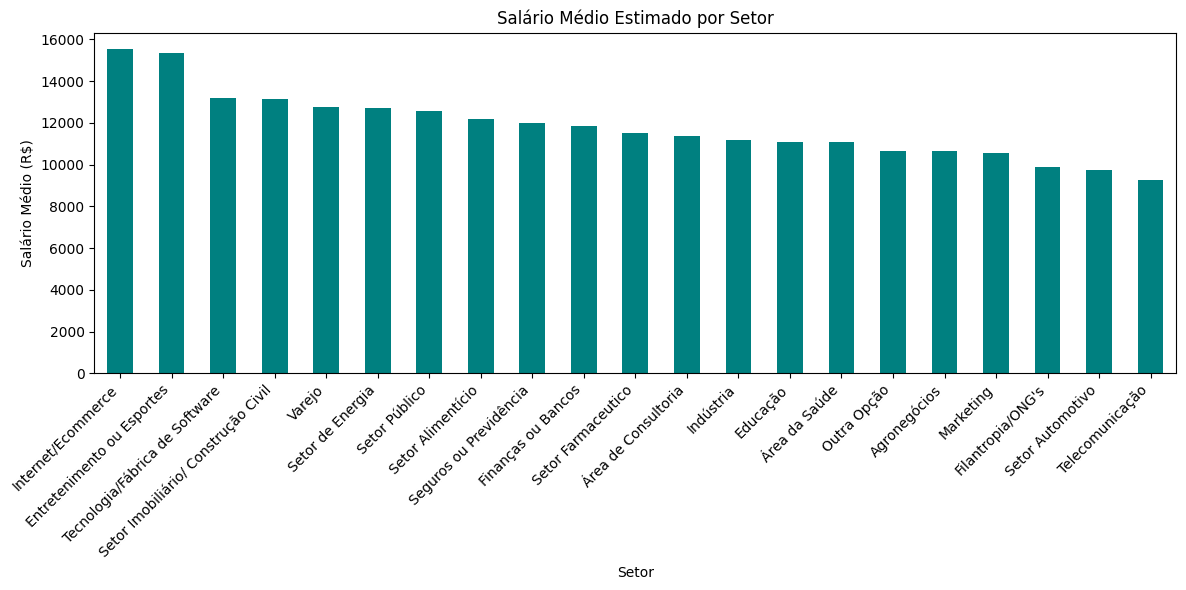

In [54]:
media_setor = df24.groupby('setor')['salario_medio_estimado'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
media_setor.plot(kind='bar', color='teal')

plt.title('Salário Médio Estimado por Setor')
plt.ylabel('Salário Médio (R$)')
plt.xlabel('Setor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 4.3 Distribuição Salarial por Setor


Permite observar a dispersão e variabilidade salarial por setor:

- Setores como Internet/E-commerce e Entretenimento têm caudas longas e outliers, indicando presença de altos salários.

- ONGs, Educação e Telecomunicações têm distribuições mais compactas e medianas mais baixas.

- Tecnologia tem uma mediana alta e grande variação, sugerindo oportunidades para diferentes níveis.

Setores com ampla dispersão indicam alta diversidade de cargos e salários, possivelmente com gaps entre níveis hierárquicos.



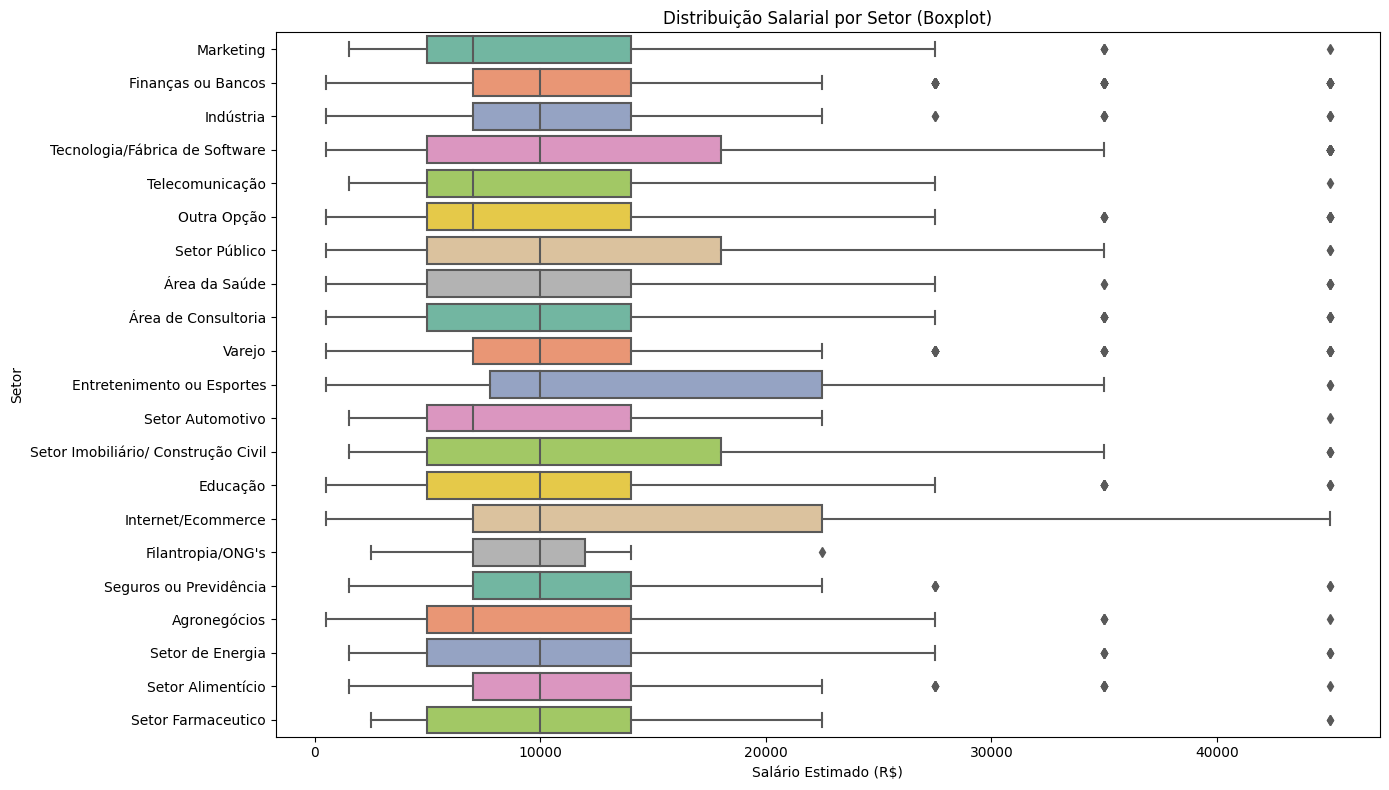

In [55]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df24, x='salario_medio_estimado', y='setor', palette='Set2')
plt.title('Distribuição Salarial por Setor (Boxplot)')
plt.xlabel('Salário Estimado (R$)')
plt.ylabel('Setor')
plt.tight_layout()
plt.show()


## 4.4 Distribuição Individual por Setor e Nível (Júnior, Pleno, Sênior)

- Existe uma clara progressão salarial dos níveis Júnior → Pleno → Sênior em todos os setores.

- Alguns setores como Internet, Entretenimento, Tecnologia e Saúde têm seniores com salários muito altos (acima de R$ 40.000).

- Setores como ONGs, Educação e Telecomunicação mostram concentrações salariais mais baixas mesmo em níveis Sênior.

- A dispersão reforça que setores inovadores têm maior amplitude de remuneração.



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



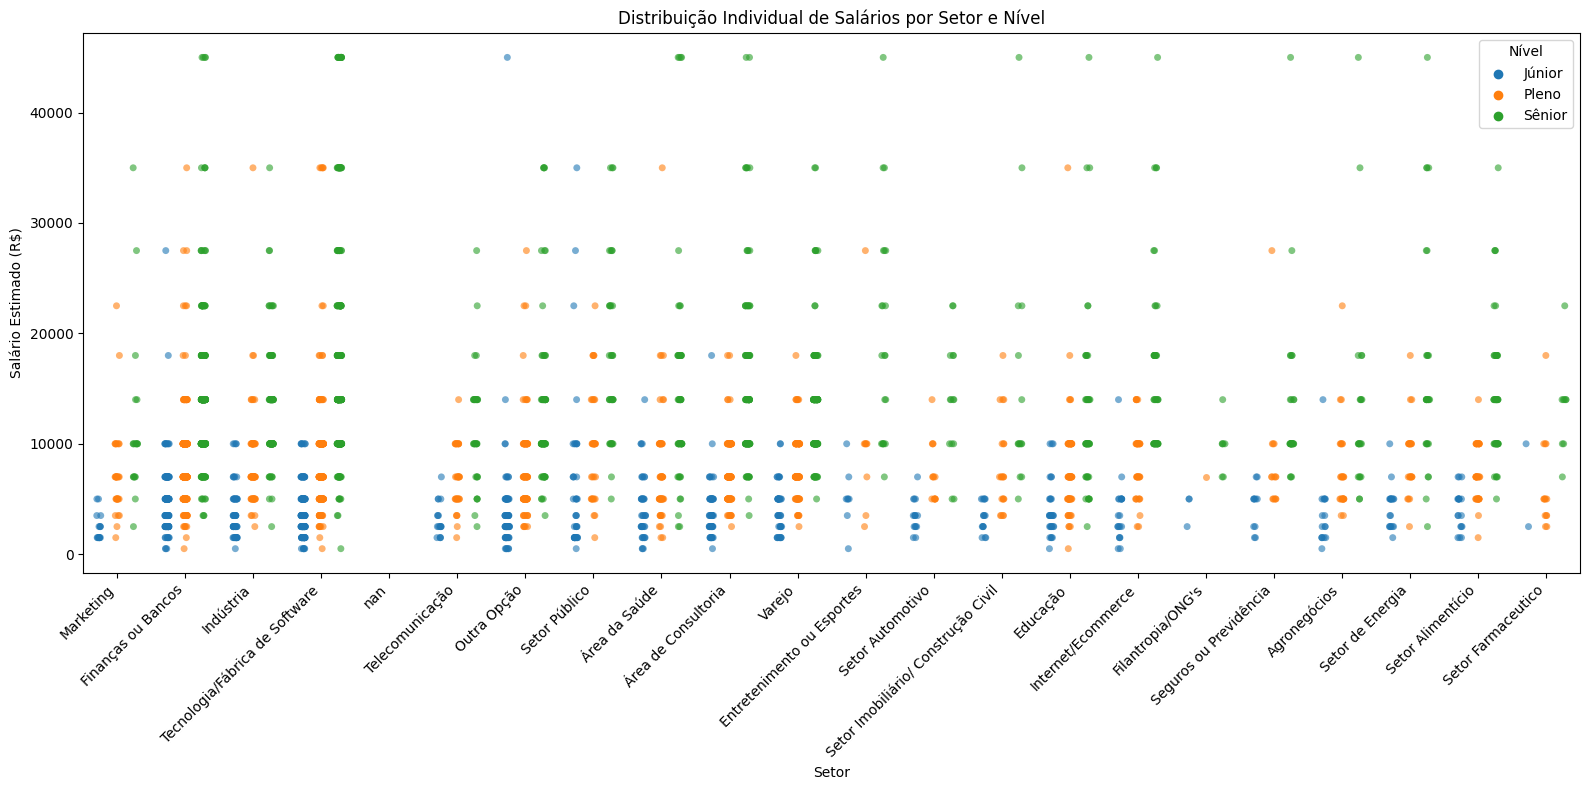

In [56]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=df24, x='setor', y='salario_medio_estimado', hue='nivel', jitter=True, dodge=True, alpha=0.6)
plt.title('Distribuição Individual de Salários por Setor e Nível')
plt.ylabel('Salário Estimado (R$)')
plt.xlabel('Setor')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nível')
plt.tight_layout()
plt.show()


O mercado de dados e tecnologia concentra os maiores salários médios, especialmente em setores mais digitais como E-commerce, Entretenimento e Tecnologia.

A faixa salarial predominante está entre RS 6.000 e RS 16.000, mas há profissionais com ganhos expressivos acima de R$ 30.000.

A senioridade impacta fortemente os salários, e setores com maior maturidade tecnológica oferecem melhor progressão.

Já setores sociais (Educação, ONGs, Saúde) tendem a pagar menos e possuem menos variação salarial.

A análise mostra um mercado com grande diversidade, mas também desigualdades salariais relevantes entre setores e níveis.

# 5 Tendencias temporais

In [57]:
df22.columns = ['_'.join([str(i) for i in col]).strip() if isinstance(col, tuple) else str(col).strip() for col in df22.columns]
df21.columns = ['_'.join([str(i) for i in col]).strip() if isinstance(col, tuple) else str(col).strip() for col in df21.columns]
df23.columns = ['_'.join([str(i) for i in col]).strip() if isinstance(col, tuple) else str(col).strip() for col in df23.columns]

colunas_comuns = list(set(df21.columns) & set(df22.columns) & set(df23.columns) & set(df24.columns))

df = pd.concat([df21[colunas_comuns],
                df22[colunas_comuns],
                df23[colunas_comuns],
                df24[colunas_comuns]],
               ignore_index=True)

In [58]:
# Dicionário de mapeamento para padronizar setores
mapa_setores = {
    'consultoria': 'Consultoria',
    'Área de Consultoria': 'Consultoria',
    
    'Setor Imobiliário/ Construção Civil': 'Imobiliário e Construção Civil',
    'Imobiliário': 'Imobiliário e Construção Civil',
    'Construção Civil': 'Imobiliário e Construção Civil',
    
    'Setor de Energia': 'Energia',
    'Energia': 'Energia',
    
    'Outro': 'Outros',
    'Outra Opção': 'Outros',
    
    'Área da Saúde': 'Saúde & Farmacêutico',
    'Setor Farmaceutico': 'Saúde & Farmacêutico',
    
    # para evitar possíveis duplicatas com maiúsculas/minúsculas:
    'Consultoria': 'Consultoria',
    'consultoria': 'Consultoria',
}

# Substituir no DataFrame (supondo que a coluna seja 'setor')
df['setor'] = df['setor'].replace(mapa_setores)

# Para lidar com maiúsculas e minúsculas em geral (opcional):
df['setor'] = df['setor'].str.strip()  # Remove espaços extras

# Se quiser forçar a capitalização consistente:
df['setor'] = df['setor'].str.title()



## 5.1 Evolução do número de profissionais por setor

Os setores que mais se destacam em volume absoluto de profissionais são:

- Setor Alimentício e Finanças ou Bancos, com crescimento expressivo, especialmente entre 2022 e 2023.

- Seguros ou Previdência também mostra crescimento constante, mas menos acentuado.

- Setores como Consultoria, Energia, Educação, e Imobiliário e Construção Civil também apresentaram crescimento moderado até 2023, com ligeiras quedas ou estagnações em 2024.

- Alguns setores como Serviços, Setor Automotivo, e Filantropia/ONGs mantêm um número muito baixo de profissionais durante todo o período.

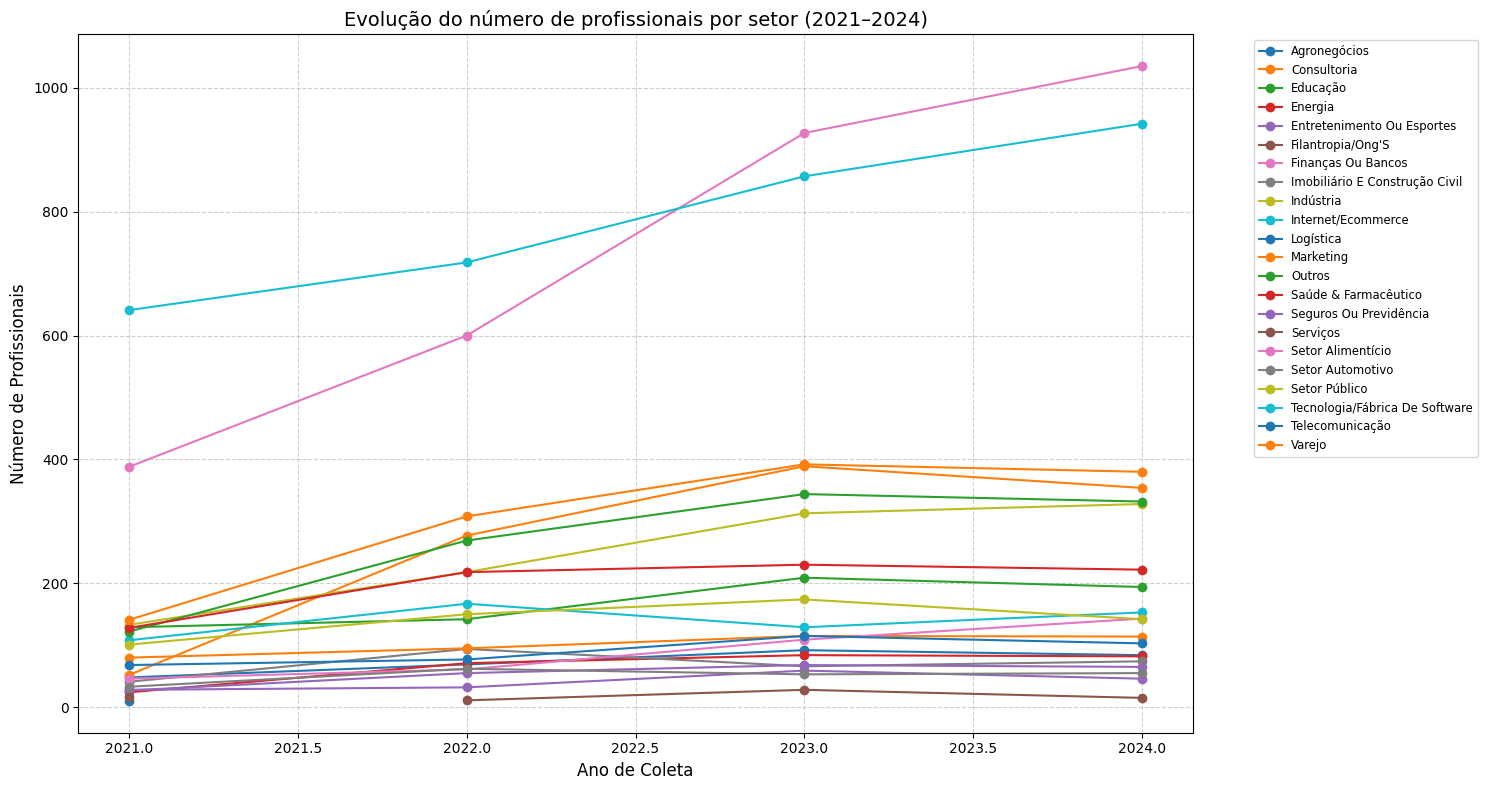

In [59]:
# Agrupando os dados
df_agg = df.groupby(['ano_coleta', 'setor']).size().reset_index(name='contagem')

# Pivotando para facilitar o uso no Matplotlib
df_pivot = df_agg.pivot(index='ano_coleta', columns='setor', values='contagem')

# Plotando com Matplotlib
plt.figure(figsize=(15, 8))
for setor in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[setor], marker='o', label=setor)

plt.title('Evolução do número de profissionais por setor (2021–2024)', fontsize=14)
plt.xlabel('Ano de Coleta', fontsize=12)
plt.ylabel('Número de Profissionais', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 5.2 Crescimento ou Queda de cada setor

### De 2021 a 2024

Este gráfico mostra o crescimento acumulado em termos percentuais.

- O destaque absoluto vai para o setor Filantropia/ONGs, com um crescimento superior a 1500%, mesmo que o número absoluto de profissionais ainda seja baixo.

- Consultoria e Setor Alimentício também apresentam crescimento elevado (próximo ou acima de 500%).

- Poucos setores tiveram queda percentual: Logística, Serviços e Varejo, o que indica possível desinteresse ou redução de oportunidades nesses setores ao longo do tempo.

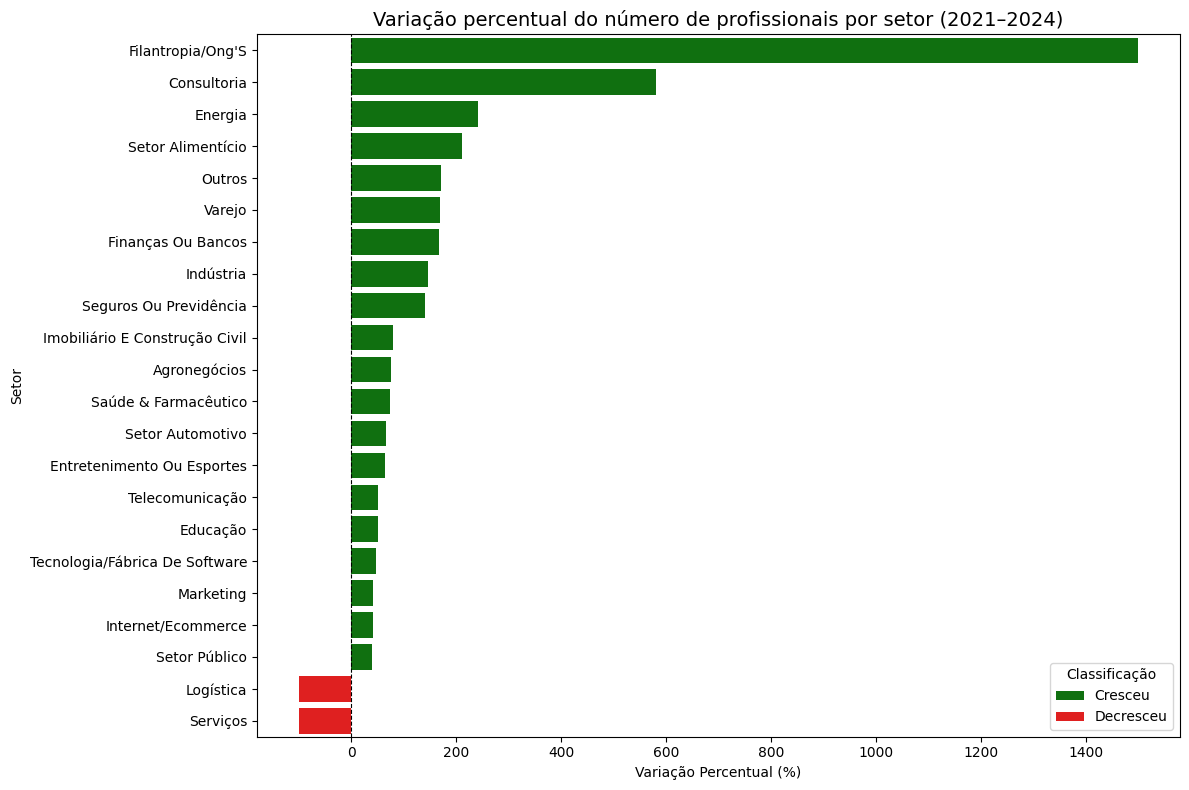

In [60]:
# 1. Pivot para ter setores como índice e anos como colunas
pivot = df_agg.pivot(index='setor', columns='ano_coleta', values='contagem').fillna(0)

# 2. Calcular variação percentual entre 2021 e 2024
pivot['variacao_pct'] = ((pivot[2024] - pivot[2021]) / pivot[2021].replace(0, 1)) * 100

# 3. Classificar
def classifica_variacao(x, limite=5):
    if x > limite:
        return 'Cresceu'
    elif x < -limite:
        return 'Decresceu'
    else:
        return 'Constante'

pivot['classificacao'] = pivot['variacao_pct'].apply(classifica_variacao)

# 4. Resetar índice para facilitar plot
df_plot = pivot.reset_index()

# 5. Ordenar
df_plot = df_plot.sort_values('variacao_pct', ascending=False)

# 6. Cores personalizadas
palette = {
    'Cresceu': 'green',
    'Decresceu': 'red',
    'Constante': 'gray'
}

# 7. Gráfico de barras horizontal com Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_plot,
    y='setor',
    x='variacao_pct',
    hue='classificacao',
    dodge=False,
    palette=palette
)

plt.title('Variação percentual do número de profissionais por setor (2021–2024)', fontsize=14)
plt.xlabel('Variação Percentual (%)')
plt.ylabel('Setor')
plt.legend(title='Classificação', loc='lower right')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


### De 2023 a 2024
Aqui vemos a variação mais recente, entre os dois últimos anos da série (2023–2024).

Setores que apresentaram crescimento:

- Tecnologia/Fábrica de Software, Setor Alimentício, Internet/E-commerce, e Imobiliário e Construção Civil com crescimento moderado (10% a 30%).

- Setores com estagnação ou variação nula: Serviços, Outros, Saúde & Farmacêutico, etc.

Várias áreas com queda acentuada, como:

- Filantropia/ONGs (cerca de -48%), Entretenimento ou Esportes, Setor Público, entre outros.

- Essas quedas indicam uma desaceleração recente após um crescimento anterior.

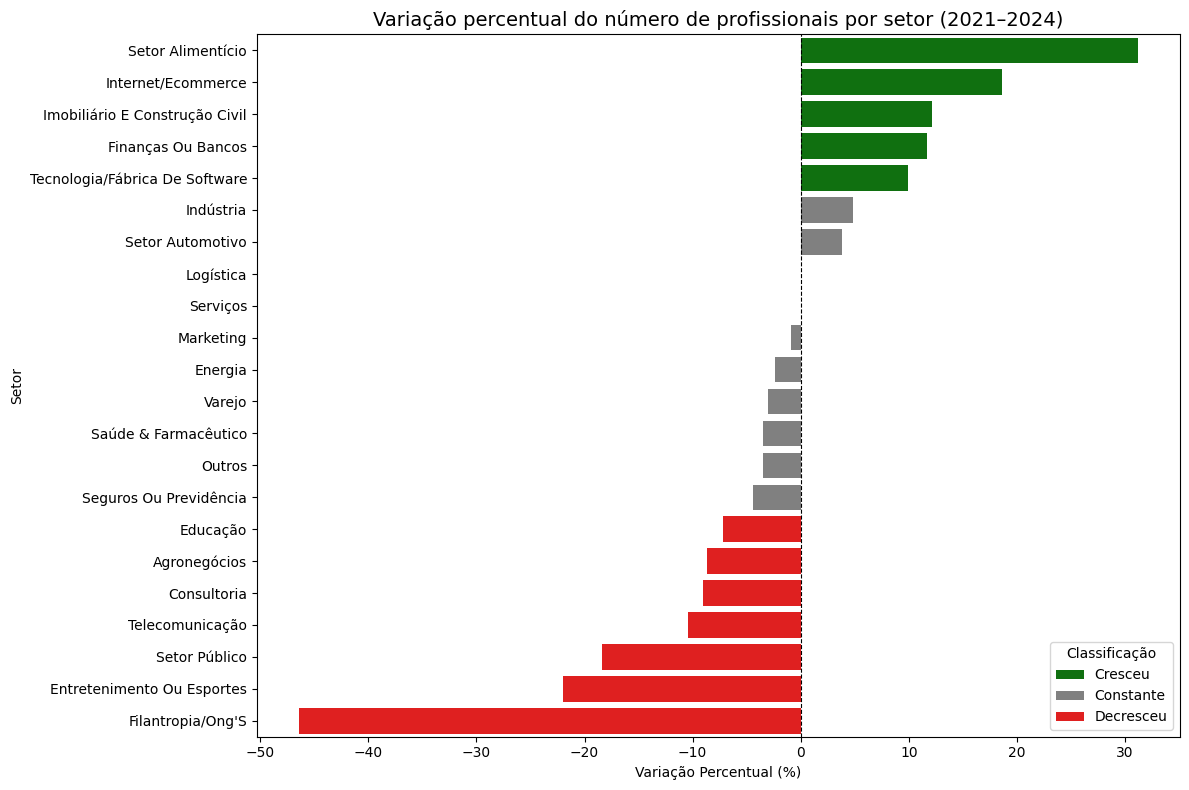

In [61]:

# 1. Pivot para ter setores como índice e anos como colunas
pivot = df_agg.pivot(index='setor', columns='ano_coleta', values='contagem').fillna(0)

# 2. Calcular variação percentual entre 2021 e 2024
pivot['variacao_pct'] = ((pivot[2024] - pivot[2023]) / pivot[2023].replace(0, 1)) * 100

# 3. Classificar
def classifica_variacao(x, limite=5):
    if x > limite:
        return 'Cresceu'
    elif x < -limite:
        return 'Decresceu'
    else:
        return 'Constante'

pivot['classificacao'] = pivot['variacao_pct'].apply(classifica_variacao)

# 4. Resetar índice para facilitar plot
df_plot = pivot.reset_index()

# 5. Ordenar
df_plot = df_plot.sort_values('variacao_pct', ascending=False)

# 6. Cores personalizadas
palette = {
    'Cresceu': 'green',
    'Decresceu': 'red',
    'Constante': 'gray'
}

# 7. Gráfico de barras horizontal com Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_plot,
    y='setor',
    x='variacao_pct',
    hue='classificacao',
    dodge=False,
    palette=palette
)

plt.title('Variação percentual do número de profissionais por setor (2021–2024)', fontsize=14)
plt.xlabel('Variação Percentual (%)')
plt.ylabel('Setor')
plt.legend(title='Classificação', loc='lower right')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()



- Crescimento Sustentado: O Setor Alimentício, Finanças/Bancos e Consultoria são os que combinam crescimento absoluto e percentual significativos. São áreas que parecem estar em alta demanda.

- Crescimento Percentual Alto com Base Baixa: O setor Filantropia/ONGs teve o maior crescimento percentual (2021–2024), mas isso provavelmente partiu de uma base extremamente baixa. A queda recente (2023–2024) pode ser um sinal de estabilização ou retração após pico de interesse.

- Setores em Queda ou Estagnação:

- Serviços, Varejo, e Logística estão em tendência de queda ou estagnação. Isso pode indicar mudança no perfil de mercado, automatização ou baixa atratividade para novos profissionais.

- Setores Emergentes: Áreas como Tecnologia/Fábrica de Software e E-commerce mostram sinais de crescimento recente e devem ser monitoradas.

# 6 Conclusões

O estudo do mercado de dados brasileiro, fundamentado nos dados do State of Data Brazil 2024, revela um ecossistema dinâmico e em constante evolução, com características distintas que variam significativamente entre os setores. A análise detalhada das cinco dimensões — distribuição setorial, perfil profissional, modelos de trabalho, remuneração e tendências temporais — oferece uma compreensão aprofundada das complexidades e oportunidades presentes nesse cenário.

Em termos de distribuição setorial, observa-se uma forte concentração de profissionais nas áreas de Finanças ou Bancos (21,28%), Tecnologia/Fábrica de Software (19,37%) e Varejo (7,81%), que, junto com a Consultoria, Indústria e outras opções genéricas, abrigam a maior parte da força de trabalho em dados. A predominância de grandes e mega empresas (acima de 101 funcionários) é notável, com 84,05% dos profissionais empregados nesses portes, e quase metade (48,02%) em empresas com mais de 3.000 funcionários. Curiosamente, o setor de Tecnologia/Fábrica de Software, embora seja o segundo maior, tem mais profissionais em empresas grandes (100-3000 funcionários) do que em mega empresas, contrastando com a tendência geral, enquanto Varejo e Indústria concentram seus profissionais em empresas gigantes.

Quanto ao perfil profissional, o mercado é majoritariamente composto por indivíduos com experiência, sendo os níveis Sênior (cerca de 1.580 profissionais) e Pleno (aproximadamente 1.380) os mais representados, o que sugere uma demanda por maior qualificação e um mercado em amadurecimento. Os cargos de Analista de Dados/Data Analyst, Cientista de Dados/Data Scientist e Engenheiro de Dados/Data Architect são os mais comuns, especialmente em Finanças, Tecnologia e Consultoria. Setores técnicos e com maior investimento em tecnologia tendem a empregar mais profissionais experientes e especializados. A proporção de gestores é mais alta em Marketing (37,72%), Internet/Ecommerce (30,07%) e Setor Imobiliário/Construção Civil (29,73%). A experiência média varia, com Consultoria, Farmacêutico e Saúde apresentando profissionais mais experientes, enquanto Educação, ONGs e Setor Alimentício podem ter concentração em perfis mais específicos. A área de Tecnologia é o destino mais comum para profissionais de dados, independentemente da formação, e há uma crescente entrada de profissionais com formações não técnicas (Economia, Administração, Saúde), apontando para o potencial de programas de transição de carreira.

No que tange aos modelos de trabalho, o estudo revela uma clara tendência dos profissionais por autonomia e flexibilidade. Há uma forte rejeição ao modelo 100% presencial em praticamente todos os setores. O modelo híbrido flexível e o 100% remoto são os mais desejados. Setores como o Público (-39,4%), Automotivo (-32,7%) e Agronegócios mostram a maior rejeição ao presencial, enquanto Filantropia/ONGs (+26,7%) e Energia (+24,4%) preferem o remoto. Há um gap significativo entre a realidade e o ideal, especialmente para o modelo híbrido flexível, com Farmacêutico (+37,9%), Setor Público (+35,2%) e Seguros (+33,8%) liderando o desejo por maior flexibilidade.

A remuneração no mercado de dados brasileiro mostra uma distribuição assimétrica, com a maior concentração de profissionais na faixa de RS 12.001 a RS 16.000/mês. Os setores com maior salário médio são Internet/E-commerce (~RS 15.500), Entretenimento ou Esportes e Tecnologia/Fábrica de Software, enquanto Telecomunicações, Setor Automotivo e ONGs/Filantropia apresentam as menores médias. Existe uma clara progressão salarial de Júnior para Sênior em todos os setores, com Internet, Entretenimento, Tecnologia e Saúde oferecendo salários muito altos para seniores (acima de R$ 40.000). Setores sociais como Educação, ONGs e Saúde tendem a pagar menos, mesmo para níveis seniores.
As tendências temporais (2021-2024) indicam um crescimento expressivo no número de profissionais em setores como Setor Alimentício e Finanças ou Bancos, especialmente entre 2022 e 2023. A Filantropia/ONGs teve o maior crescimento percentual (mais de 1500%) de 2021 a 2024, partindo de uma base baixa, mas com uma queda acentuada entre 2023 e 2024, sugerindo desaceleração. Setores como Tecnologia/Fábrica de Software, Setor Alimentício, Internet/E-commerce e Imobiliário e Construção Civil mostraram crescimento moderado no último ano analisado (2023-2024). Por outro lado, Serviços, Varejo e Logística apresentaram tendências de queda ou estagnação, o que pode indicar mudanças no perfil do mercado ou menor atratividade.

Em suma, o mercado de dados no Brasil está amadurecendo, com uma demanda crescente por profissionais experientes e especializados, concentrados em setores-chave como finanças e tecnologia. Há uma clara preferência por modelos de trabalho flexíveis, que as empresas precisam endereçar para atrair e reter talentos. Embora as remunerações sejam atraentes em setores digitais e inovadores, persistem desigualdades salariais entre as indústrias e os níveis de senioridade. As tendências de crescimento apontam para uma evolução contínua, com a emergência de novos nichos e a transformação de setores tradicionais pela adoção de dados, solidificando a área como um campo promissor, porém com desafios de adaptação e equidade.